## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

## Load Dataset

In [3]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
source = 'marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source)
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'Complain', 'Response']
            
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

## Handling Duplicate Rows

In [5]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head()

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [6]:
df.duplicated().sum()

0

In [7]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (2240, 29)
Data Frame Dimension After Duplicate Removal: (2240, 29)


In [8]:
df.duplicated(subset=["ID"]).sum()

0

## Handling Invalid Values

In [9]:
for x in df.columns : 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
['2012-09-04', '2014-03-08', '2013-08-21', '2014-02-10', '2014-01-19', '2013-09-09', '2012-11-13', '2013-05-08', '2013-06-06', '2014-03-13', '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntWines =====
[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, '.....']

===== MntFruits =====
[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, '.....']

===== MntMeatProducts =====
[546, 6, 127, 20, 118, 98, 164, 56

## Convert date columns to Datetime objects

In [10]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

## Standardized Marital Status Column

In [11]:
# Mengganti kategori 'Widow', 'Alone', 'Absurd', 'YOLO' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone', 'Absurd', 'YOLO'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [12]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

## Standardized Education Column

In [13]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [14]:
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation        Married   71613        0         0   
3  6182        1984  Graduation        Married   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

## Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

# splitting tha data
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df[['Response']], random_state=42)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print(df_train.shape)
print(df_test.shape)

(1680, 29)
(560, 29)


In [15]:
df_train.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   387        1976       Basic        Married    7500        0         0   
1  3537        1981  Graduation        Married   31089        1         0   
2  3075        1972         PhD        Married   59973        0         0   
3  4220        1970         PhD        Married   59892        0         1   
4  4472        1970         PhD       Divorced   35682        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2012-08-17       57        31          3               31                2   
2  2013-09-11       47       130         30              168               20   
3  2013-11-02       26        73          0               13                0   
4  2014-06-27       34        23          0                8                6   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 1            16                  1                2   
1                 8             4                  3                3   
2                34             0                  1                3   
3                 1             0                  1                2   
4                 2            18                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  4                  8             0   
2                    4                  7                  1             0   
3                    1                  3                  3             0   
4                    1                  3                  2             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         0  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [16]:
df_test.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  10146        1972         PhD        Married   38887        1         0   
1      1        1961  Graduation         Single   57091        0         0   
2   7875        1949  Graduation        Married   72025        0         0   
3   7807        1974  Graduation        Married   44989        0         1   
4   4268        1959  Graduation        Married   53154        0         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2014-03-02       17        25          1               13                0   
1  2014-06-15        0       464          5               64                7   
2  2014-04-29       46       967          0              617               43   
3  2012-09-12       26        98          0              106               49   
4  2014-06-09       50       129          0               21                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 0             3                  1                1   
1                 0            37                  1                7   
2                50             0                  1                4   
3                10           106                  5                5   
4                 1             7                  1                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  7             0   
1                    3                  7                  5             0   
2                    8                 13                  2             0   
3                    1                  5                  6             0   
4                    1                  4                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             1         0   
2             1             1             1             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         0  
1              3         11         1  
2              3         11         1  
3              3         11         0  
4              3         11         0

## Handling Missing Values

In [17]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc["NULL Train"] = df_train[nvc.index].isnull().sum()
nvc["NULL Test"] = df_test[nvc.index].isnull().sum()
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc

Missing values status: True


Total Null Values  Percentage       Data Type  \
Income                              24       1.071         float64   
ID                                   0           0           int64   
Year_Birth                           0           0           int64   
Education                            0           0          object   
Marital_Status                       0           0          object   
Kidhome                              0           0           int64   
Teenhome                             0           0           int64   
Dt_Customer                          0           0  datetime64[ns]   
Recency                              0           0           int64   
MntWines                             0           0           int64   
MntFruits                            0           0           int64   
MntMeatProducts                      0           0           int64   
MntFishProducts                      0           0           int64   
MntSweetProducts                     0           0           int64   
MntGoldProds                         0           0           int64   
NumDealsPurchases                    0           0           int64   
NumWebPurchases                      0           0           int64   
NumCatalogPurchases                  0           0           int64   
NumStorePurchases                    0           0           int64   
NumWebVisitsMonth                    0           0           int64   
AcceptedCmp3                         0           0           int64   
AcceptedCmp4                         0           0           int64   
AcceptedCmp5                         0           0           int64   
AcceptedCmp1                         0           0           int64   
AcceptedCmp2                         0           0           int64   
Complain                             0           0           int64   
Z_CostContact                        0           0           int64   
Z_Revenue                            0           0           int64   
Response                             0           0           int64   

                     NULL Train  NULL Test  
Income                       20          4  
ID                            0          0  
Year_Birth                    0          0  
Education                     0          0  
Marital_Status                0          0  
Kidhome                       0          0  
Teenhome                      0          0  
Dt_Customer                   0          0  
Recency                       0          0  
MntWines                      0          0  
MntFruits                     0          0  
MntMeatProducts               0          0  
MntFishProducts               0          0  
MntSweetProducts              0          0  
MntGoldProds                  0          0  
NumDealsPurchases             0          0  
NumWebPurchases               0          0  
NumCatalogPurchases           0          0  
NumStorePurchases             0          0  
NumWebVisitsMonth             0          0  
AcceptedCmp3                  0          0  
AcceptedCmp4                  0          0  
AcceptedCmp5                  0          0  
AcceptedCmp1                  0          0  
AcceptedCmp2                  0          0  
Complain                      0          0  
Z_CostContact                 0          0  
Z_Revenue                     0          0  
Response                      0          0

## Multivariate Analysis

In [18]:
df_ma_train = df_train.copy()
df_ma_test = df_test.copy()

In [19]:
drop = ["ID", "Education", "Marital_Status", "Dt_Customer"]
df_ma_train = df_ma_train.drop(drop, axis=1)
df_ma_test = df_ma_test.drop(drop, axis=1)

In [20]:
df_ma_train.head()

Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1976    7500        0         0       59         6         16   
1        1981   31089        1         0       57        31          3   
2        1972   59973        0         0       47       130         30   
3        1970   59892        0         1       26        73          0   
4        1970   35682        1         0       34        23          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0               11               11                 1            16   
1               31                2                 8             4   
2              168               20                34             0   
3               13                0                 1             0   
4                8                6                 2            18   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                2                    0                  3   
1                  3                3                    0                  4   
2                  1                3                    4                  7   
3                  1                2                    1                  3   
4                  1                1                    1                  3   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  8             0             0             0             0   
1                  8             0             0             0             0   
2                  1             0             0             0             0   
3                  3             0             0             0             0   
4                  2             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         0  
1             0         0              3         11         0  
2             0         0              3         11         0  
3             0         0              3         11         0  
4             0         0              3         11         0

In [21]:
df_ma_test.head()

Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1972   38887        1         0       17        25          1   
1        1961   57091        0         0        0       464          5   
2        1949   72025        0         0       46       967          0   
3        1974   44989        0         1       26        98          0   
4        1959   53154        0         1       50       129          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0               13                0                 0             3   
1               64                7                 0            37   
2              617               43                50             0   
3              106               49                10           106   
4               21                0                 1             7   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                1                    0                  3   
1                  1                7                    3                  7   
2                  1                4                    8                 13   
3                  5                5                    1                  5   
4                  1                3                    1                  4   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             1             1             1   
3                  6             0             0             0             0   
4                  4             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         0  
1             1         0              3         11         1  
2             0         0              3         11         1  
3             0         0              3         11         0  
4             0         0              3         11         0

## Imputation using `MICE` with `LightGBM`

In [23]:
print("Number of missing values Income before Imputation (train set) =", df_train["Income"].isna().sum())
print("Number of missing values Income before Imputation (test set) =", df_test["Income"].isna().sum())

Number of missing values Income before Imputation (train set) = 0
Number of missing values Income before Imputation (test set) = 4


In [22]:
import miceforest as mf

df_ma_train_amp = mf.ampute_data(df_ma_train, perc=0.25,random_state=1991)

# Train

# Create kernel. 
kds = mf.ImputationKernel(
  data = df_ma_train,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed_train = kds.complete_data()
df_train["Income"] = df_imputed_train["Income"].copy()

In [24]:
# Test
new_data_imputed = kds.impute_new_data(df_ma_test)
# Return a completed dataset
df_imputed_test = new_data_imputed.complete_data(0)
df_test["Income"] = df_imputed_test["Income"].copy()

In [25]:
print("Number of missing values Income after Imputation (train set) =", df_train["Income"].isna().sum())
print("Number of missing values Income after Imputation (test set) =", df_test["Income"].isna().sum())

Number of missing values Income sesudah Imputation (train set) = 0
Number of missing values Income sesudah Imputation (test set) = 0


## Handling Outliers

In [26]:
print(f'Jumlah baris: {len(df_train)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df_train))
for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit))
    outlier.append(len(df_train[~filter_outlier]))
    no_outlier.append(len(df_train[filter_outlier]))
    is_outlier.append(df_train[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df_train[~filtered_entries]))
print("Not Outlier All Data :", len(df_train[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 1680
Outlier All Data : 536
Not Outlier All Data : 1144



Column Name  is Outlier  Lower Limit  Upper Limit  Outlier  \
0            Year_Birth        True         1933         2005        1   
1                Income        True   -15279.250   118574.750        4   
2               Kidhome       False       -1.500        2.500        0   
3              Teenhome       False       -1.500        2.500        0   
4               Recency       False          -51          149        0   
5              MntWines        True     -693.750     1220.250       26   
6             MntFruits        True      -44.500       79.500      179   
7       MntMeatProducts        True     -315.875      569.125      122   
8       MntFishProducts        True      -67.500      120.500      171   
9      MntSweetProducts        True      -45.500       78.500      192   
10         MntGoldProds        True          -60          124      168   
11    NumDealsPurchases        True           -2            6       61   
12      NumWebPurchases        True           -4           12        4   
13  NumCatalogPurchases        True           -6           10       18   
14    NumStorePurchases       False       -4.500       15.500        0   
15    NumWebVisitsMonth        True           -3           13        8   
16        Z_CostContact       False            3            3        0   
17            Z_Revenue       False           11           11        0   

    No Outlier  
0         1679  
1         1676  
2         1680  
3         1680  
4         1680  
5         1654  
6         1501  
7         1558  
8         1509  
9         1488  
10        1512  
11        1619  
12        1676  
13        1662  
14        1680  
15        1672  
16        1680  
17        1680

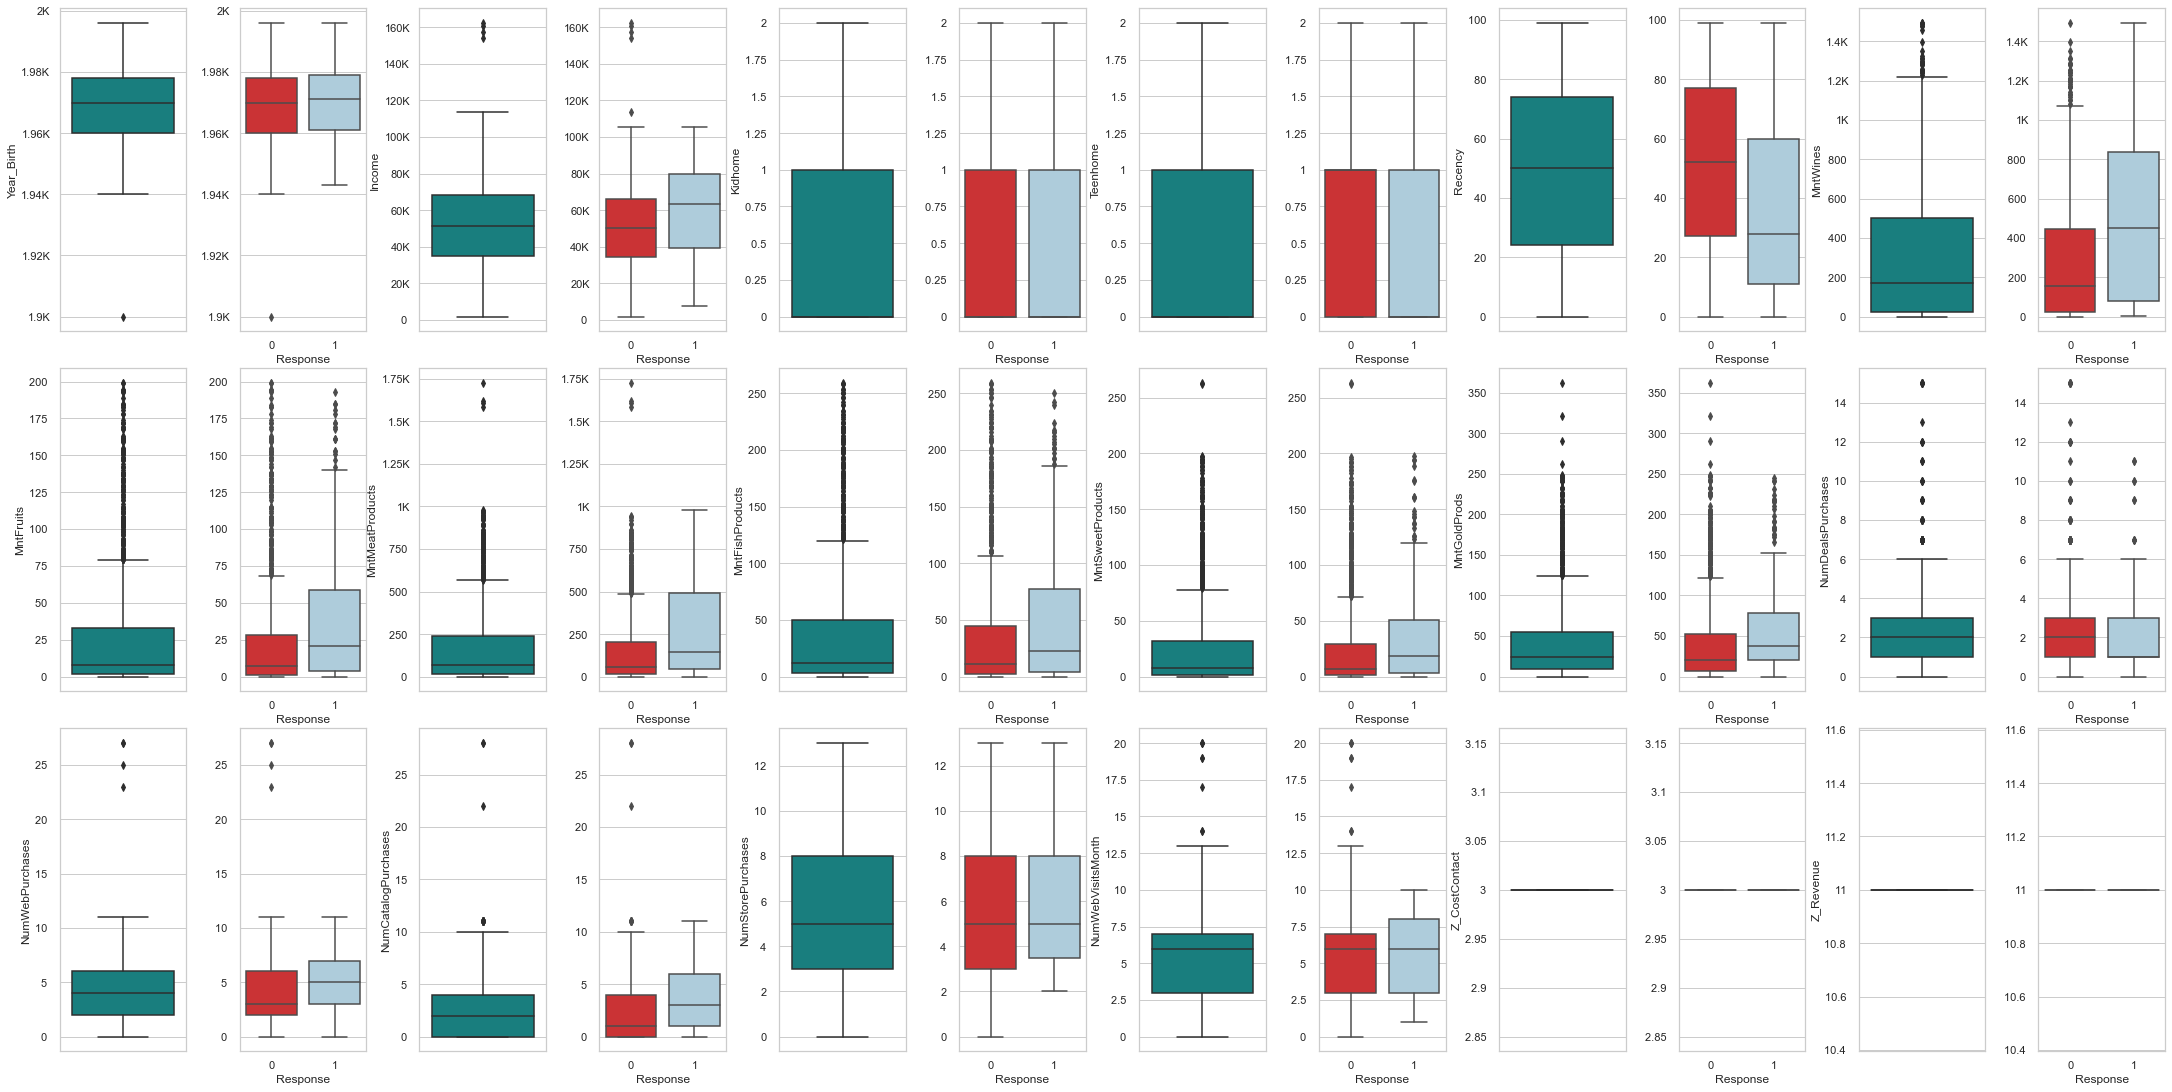

In [27]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(30, 15))
n = 3
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(num_cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
    sns.boxplot(y=df_train[num_cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df_train["Response"], y=df_train[num_cols[j]], orient='v', palette=colors)
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

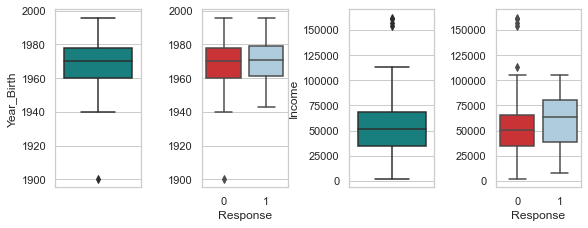

In [28]:
cols = ["Year_Birth","Income"]

plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df_train[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df_train["Response"], y=df_train[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [29]:
df_train[["Year_Birth", "Income"]].describe()

Year_Birth    Income
count        1680      1680
mean     1969.161 51727.447
std        11.796 21473.355
min          1900      1730
25%          1960     34916
50%          1970 51268.500
75%          1978 68379.500
max          1996    162397

## Manually Trimmed

In [30]:
print("Number of data before handling outliers :", df_train.shape[0])

df_train = df_train[~(df_train["Year_Birth"] <= 1900)]
print("Number of data after handling outliers (Year_Birth) : {}".format(df_train.shape[0]))

df_train = df_train[~(df_train["Income"] >= 666666)]
print("Number of data after handling outliers (Income) : {}".format(df_train.shape[0]))

Number of data before handling outliers : 1680
Number of data after handling outliers (Year_Birth) : 1679
Number of data after handling outliers (Income) : 1679


In [31]:
df_train[["Year_Birth", "Income"]].describe()

Year_Birth    Income
count        1679      1679
mean     1969.202 51736.433
std        11.678 21476.592
min          1940      1730
25%          1960     34916
50%          1970     51287
75%          1978     68407
max          1996    162397

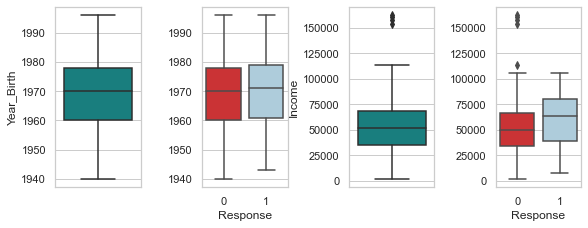

In [32]:
plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df_train[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df_train["Response"], y=df_train[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [33]:
df.reset_index(drop=True, inplace=True)

## Feature Engineering / Extraction

**Merge Datasets (Train & Test)**

In [34]:
df_tr = df_train.copy()
df_tr["dtype"] = "train"

df_te = df_test.copy()
df_te["dtype"] = "test"

df_all = pd.concat([df_tr, df_te]).reset_index(drop=True)
df_all.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   387        1976       Basic        Married    7500        0         0   
1  3537        1981  Graduation        Married   31089        1         0   
2  3075        1972         PhD        Married   59973        0         0   
3  4220        1970         PhD        Married   59892        0         1   
4  4472        1970         PhD       Divorced   35682        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2012-08-17       57        31          3               31                2   
2  2013-09-11       47       130         30              168               20   
3  2013-11-02       26        73          0               13                0   
4  2014-06-27       34        23          0                8                6   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 1            16                  1                2   
1                 8             4                  3                3   
2                34             0                  1                3   
3                 1             0                  1                2   
4                 2            18                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  4                  8             0   
2                    4                  7                  1             0   
3                    1                  3                  3             0   
4                    1                  3                  2             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  dtype  
0              3         11         0  train  
1              3         11         0  train  
2              3         11         0  train  
3              3         11         0  train  
4              3         11         0  train

**Create `Age` Feature**

In [35]:
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df_all['Age'] = currentYear - df_all['Year_Birth']

**Create `Age Group` Feature** 

In [36]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df_all['Age_group'] = df_all["Age"].apply(lambda x: age_group(x))

**Create `Has_child` Feature**

In [37]:
df_all['Has_child'] = np.where(df_all["Kidhome"]+df_all["Teenhome"] > 0, 1, 0)

**Create `Dependents` Feature**

In [38]:
df_all['Dependents'] = df_all['Kidhome'] + df_all['Teenhome']

**Create `Lifetime` feature**

In [39]:
df_all['Lifetime'] = (2014 - df_all["Dt_Customer"].dt.year)*12 + df_all["Dt_Customer"].dt.month

**Create `Spending` feature**

In [40]:
df_all['Spending']=df_all['MntWines']+ \
    df_all['MntFruits']+ \
    df_all['MntMeatProducts']+ \
    df_all['MntFishProducts']+ \
    df_all['MntSweetProducts']+ \
    df_all['MntGoldProds']

**Create feature for `Primary and Tertiary product`**

In [41]:
df_all['Primary_purchase'] = df_all['MntFruits']+df_all['MntMeatProducts']+df_all['MntFishProducts']
df_all['Tertiary_purchase'] = df_all['MntWines']+df_all['MntSweetProducts']+df_all["MntGoldProds"]

**Create feature for `Total of Purchases`**

In [42]:
df_all['Total_Purchases'] = df_all['NumDealsPurchases'] + \
    df_all['NumWebPurchases'] + \
    df_all['NumCatalogPurchases'] + \
    df_all['NumStorePurchases']

**Create feature for `Total_Cmp`**

In [43]:
df_all['Total_Cmp']=df_all['AcceptedCmp1'].astype("int64")+ \
    df_all['AcceptedCmp2'].astype("int64")+ \
    df_all['AcceptedCmp3'].astype("int64")+ \
    df_all['AcceptedCmp4'].astype("int64")+ \
    df_all['AcceptedCmp5'].astype("int64")

**Create feature for `Ever_Accept`**

In [44]:
df_all['Ever_Accept']=df_all['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

**Create feature `Total Revenue`**

In [45]:
# total revenue
df_all['Total_revenue'] = (df_all['Total_Cmp']) * df_all['Z_Revenue']
df_all[['Z_Revenue', 'Total_revenue']].sample(5)

Z_Revenue  Total_revenue
1224         11              0
1490         11              0
1533         11              0
278          11              0
796          11             11

**Membuat Kolom `Income Segmentation`**

- None -> Missing values
- High -> >= q3(68487)
- Medium -> q1(35331) - q3(68487)
- Low -> < q1(35331)

In [46]:
Q1 = df_all["Income"].quantile(.25)
print(Q1)
Q3 = df_all["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df_all["Income_sgmt"] = df_all["Income"].fillna("None")
df_all["Income_sgmt"] = df_all["Income_sgmt"].apply(lambda x: income_sgmt(x))

35331.0
68487.0


In [47]:
df_all["Income_sgmt"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

**Create feature for `Conversion Rate Web`**

In [48]:
df_all['Conversion_rate_web'] = np.round(df_all['Total_Purchases'] / df_all['NumWebVisitsMonth'], 2)
df_all['Conversion_rate_web'].fillna(0, inplace=True)
df_all['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

**Create feature for `Month Joined`**

In [49]:
df_all['Month_joined'] = df_all['Dt_Customer'].dt.month

**Create feature for `Recency_sgmt`**

In [50]:
num_score = 5
cek = pd.qcut(df_all['Recency'].unique(), num_score, labels=range(num_score, 0, -1))
cek = pd.DataFrame({
    "value":df_all['Recency'].unique(),
    "score": cek
})

cek.groupby(['score'])[['value']] \
    .agg(['min', 'max']).sort_index(ascending=False) \
    .style.background_gradient(cmap='Reds')

In [51]:
divided = {5: 19, 4: 39, 3: 59, 2: 79}
 
def RScore(x,d):
    if x <= d[5]:
        return 4
    elif x <= d[4]:
        return 3
    elif x <= d[3]: 
        return 2
    elif x <= d[2]: 
        return 1
    else:
        return 0

df_all['Recency_sgmt'] = df_all['Recency'].apply(lambda x: RScore(x, divided))
df_all.groupby(['Recency_sgmt'])[['Recency']].agg(['min', 'max', 'count']).style.background_gradient(cmap='Reds')

In [52]:
df_all.sample(5)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
1898   793        1973  Graduation        Married   20895        1         0   
715   4998        1962  Graduation        Married   76081        0         0   
2185   607        1955      Master       Divorced   41769        0         1   
1523  2532        1987      Master         Single   73454        0         0   
224   4432        1976  Graduation       Divorced   31615        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1898  2012-10-06       24        18          3               17   
715   2014-05-23       85       292         30              415   
2185  2013-02-13       31       302         29              131   
1523  2014-03-01       95       982         73              351   
224   2013-03-16       82         2          3               20   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1898                3                 0             4                  1   
715                63                33           200                  1   
2185               32                 0            27                  6   
1523               56                14           175                  1   
224                 6                11             9                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1898                2                    0                  3   
715                 4                    5                  4   
2185                8                    1                  7   
1523                2                    4                  6   
224                 2                    0                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1898                  9             0             0             0   
715                   2             0             0             0   
2185                  8             0             0             0   
1523                  5             1             0             0   
224                   7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
1898             0             0         0              3         11   
715              1             0         0              3         11   
2185             0             0         0              3         11   
1523             0             0         0              3         11   
224              0             0         0              3         11   

      Response  dtype  Age     Age_group  Has_child  Dependents  Lifetime  \
1898         0   test   41         Adult          1           1        34   
715          0  train   52  Senior Adult          0           0         5   
2185         0   test   59  Senior Adult          1           1        14   
1523         0  train   27   Young Adult          0           0         3   
224          0  train   38         Adult          1           1        15   

      Spending  Primary_purchase  Tertiary_purchase  Total_Purchases  \
1898        45                23                 22                6   
715       1033               508                525               14   
2185       521               192                329               22   
1523      1651               480               1171               13   
224         51                29                 22                7   

      Total_Cmp  Ever_Accept  Total_revenue Income_sgmt  Conversion_rate_web  \
1898          0            0              0         Low                0.670   
715           1            1             11        High                    7   
2185          0            0              0      Medium                2.750   
1523          1            1             11        High                2.600   
224           0            0              0         Low                    1   

      Month_joined  Recency_sgmt  
1898            

In [53]:
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']
cat_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
           'Ever_Accept', 'Complain', 'Response', 'Has_child', 'Recency_sgmt']

num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Lifetime', 'Spending', 
       'Primary_purchase', 'Tertiary_purchase', 'Total_Purchases', 'NumWebVisitsMonth', 'Conversion_rate_web', 
       'Total_Cmp', 'Total_revenue', 'Month_joined']

num_one = ['Z_CostContact', 'Z_Revenue']

num_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

timestamp = ["Dt_Customer"]

In [54]:
allcol = cat_str + cat_int + num + num_one + num_product + num_purchases + timestamp
for i in df_all:
    if i not in allcol:
        print(i)

dtype


In [55]:
#cek unique value
cat_cols = cat_str+cat_int
for x in cat_cols: 
    unq = list(df_all[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

num_cols = num + num_one + num_product + num_purchases
for x in num_cols + timestamp: 
    print("{} = {} - {}".format(x, min(df_all[x]), max(df_all[x])))

===== Education =====
['Basic', 'Graduation', 'PhD', 'Master']

===== Marital_Status =====
['Married', 'Divorced', 'Single']

===== Age_group =====
['Adult', 'Senior Adult', 'Young Adult']

===== Income_sgmt =====
['Low', 'Medium', 'High']

===== ID =====
[387, 3537, 3075, 4220, 4472, 4073, 503, 2426, 1764, 8275, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== AcceptedCmp1 =====
[0, 1]

===== AcceptedCmp2 =====
[0, 1]

===== AcceptedCmp3 =====
[0, 1]

===== AcceptedCmp4 =====
[0, 1]

===== AcceptedCmp5 =====
[0, 1]

===== Ever_Accept =====
[0, 1]

===== Complain =====
[0, 1]

===== Response =====
[0, 1]

===== Has_child =====
[0, 1]

===== Recency_sgmt =====
[2, 3, 4, 0, 1]

Year_Birth = 1893 - 1996
Income = 1730.0 - 666666.0
Kidhome = 0 - 2
Teenhome = 0 - 2
Recency = 0 - 99
Age = 18 - 121
Dependents = 0 - 3
Lifetime = 1 - 36
Spending = 5 - 2525
Primary_purchase = 1 - 1727
Tertiary_purchase = 3 - 1689
Total_Purchases = 0 - 44
NumWebVisitsMonth = 0 - 20
Co

In [56]:
new_cols = list(df_all.columns.values)
new_cols.remove("Response")
new_cols.append("Response")
df_all = df_all[new_cols].copy()

In [57]:
df_all.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'dtype',
       'Age', 'Age_group', 'Has_child', 'Dependents', 'Lifetime', 'Spending',
       'Primary_purchase', 'Tertiary_purchase', 'Total_Purchases', 'Total_Cmp',
       'Ever_Accept', 'Total_revenue', 'Income_sgmt', 'Conversion_rate_web',
       'Month_joined', 'Recency_sgmt', 'Response'],
      dtype='object')

**Splitting Datasets (Train & Test)**

In [58]:
df_train = df_all[df_all["dtype"] == "train"].copy()
df_train.drop("dtype", axis=1, inplace=True)
df_train.reset_index(drop=True, inplace=True)

df_test = df_all[df_all["dtype"] == "test"].copy()
df_test.drop("dtype", axis=1, inplace=True)
df_test.reset_index(drop=True, inplace=True)

## Feature Transformation (Numeric)

In [59]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df_train[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(["Type of Distribution","Column Name"]).reset_index(drop=True)
dist

Column Name  Skewness  Kurtosis  \
0               Kidhome     0.624    -0.794   
1              Teenhome     0.442    -0.918   
2   Conversion_rate_web     2.359     6.967   
3       MntFishProducts     1.921     3.072   
4             MntFruits     2.135     4.236   
5          MntGoldProds     1.925     3.755   
6       MntMeatProducts     2.079     5.503   
7      MntSweetProducts     2.184     4.713   
8              MntWines     1.179     0.632   
9   NumCatalogPurchases     1.891     8.297   
10    NumDealsPurchases     2.528     9.902   
11      NumWebPurchases     1.549     6.927   
12     Primary_purchase     1.589     2.209   
13            Total_Cmp     2.733     8.033   
14        Total_revenue     2.733     8.033   
15           Dependents     0.425    -0.251   
16               Income     0.264     0.381   
17    NumWebVisitsMonth     0.351     2.385   
18      Total_Purchases     0.263    -0.837   
19    NumStorePurchases     0.697    -0.609   
20             Spending     0.839    -0.402   
21    Tertiary_purchase     0.966     0.039   
22                  Age     0.116    -0.749   
23             Lifetime     0.038    -1.038   
24         Month_joined    -0.026    -1.282   
25              Recency    -0.004    -1.206   
26           Year_Birth    -0.116    -0.749   
27        Z_CostContact       NaN       NaN   
28            Z_Revenue       NaN       NaN   

                          Type of Distribution  
0                         Bimodal Distribution  
1                         Bimodal Distribution  
2                     Highly Positively Skewed  
3                     Highly Positively Skewed  
4                     Highly Positively Skewed  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                    Highly Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16  Moderately Normal Distribution (Symmetric)  
17  Moderately Normal Distribution (Symmetric)  
18  Moderately Normal Distribution (Symmetric)  
19                Moderately Positively Skewed  
20                Moderately Positively Skewed  
21                Moderately Positively Skewed  
22             Normal Distribution (Symmetric)  
23             Normal Distribution (Symmetric)  
24             Normal Distribution (Symmetric)  
25             Normal Distribution (Symmetric)  
26             Normal Distribution (Symmetric)  
27                        Uniform Distribution  
28                        Uniform Distribution

In [61]:
exclude = ["Kidhome", "Teenhome", "Dependents", "Total_Cmp"]

log_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Positively Skewed") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

norm_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Normal Distribution") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

print("Log Transformation =", log_cols)
print("Standardization =", norm_cols)

Log Transformation = ['Conversion_rate_web', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Primary_purchase', 'Spending', 'Tertiary_purchase', 'Total_revenue']
Standardization = ['Age', 'Income', 'Lifetime', 'Month_joined', 'NumWebVisitsMonth', 'Recency', 'Total_Purchases', 'Year_Birth']


In [62]:
log_cols = log_cols + norm_cols

### **Log Transformation**

Numerical variables may have high skewed and non-normal distribution (Gaussian Distribution) caused by outliers, highly exponential distributions, etc. Therefore we go for data transformation.

In Log transformation each variable of x will be replaced by log(x) with base 10, base 2, or natural log.

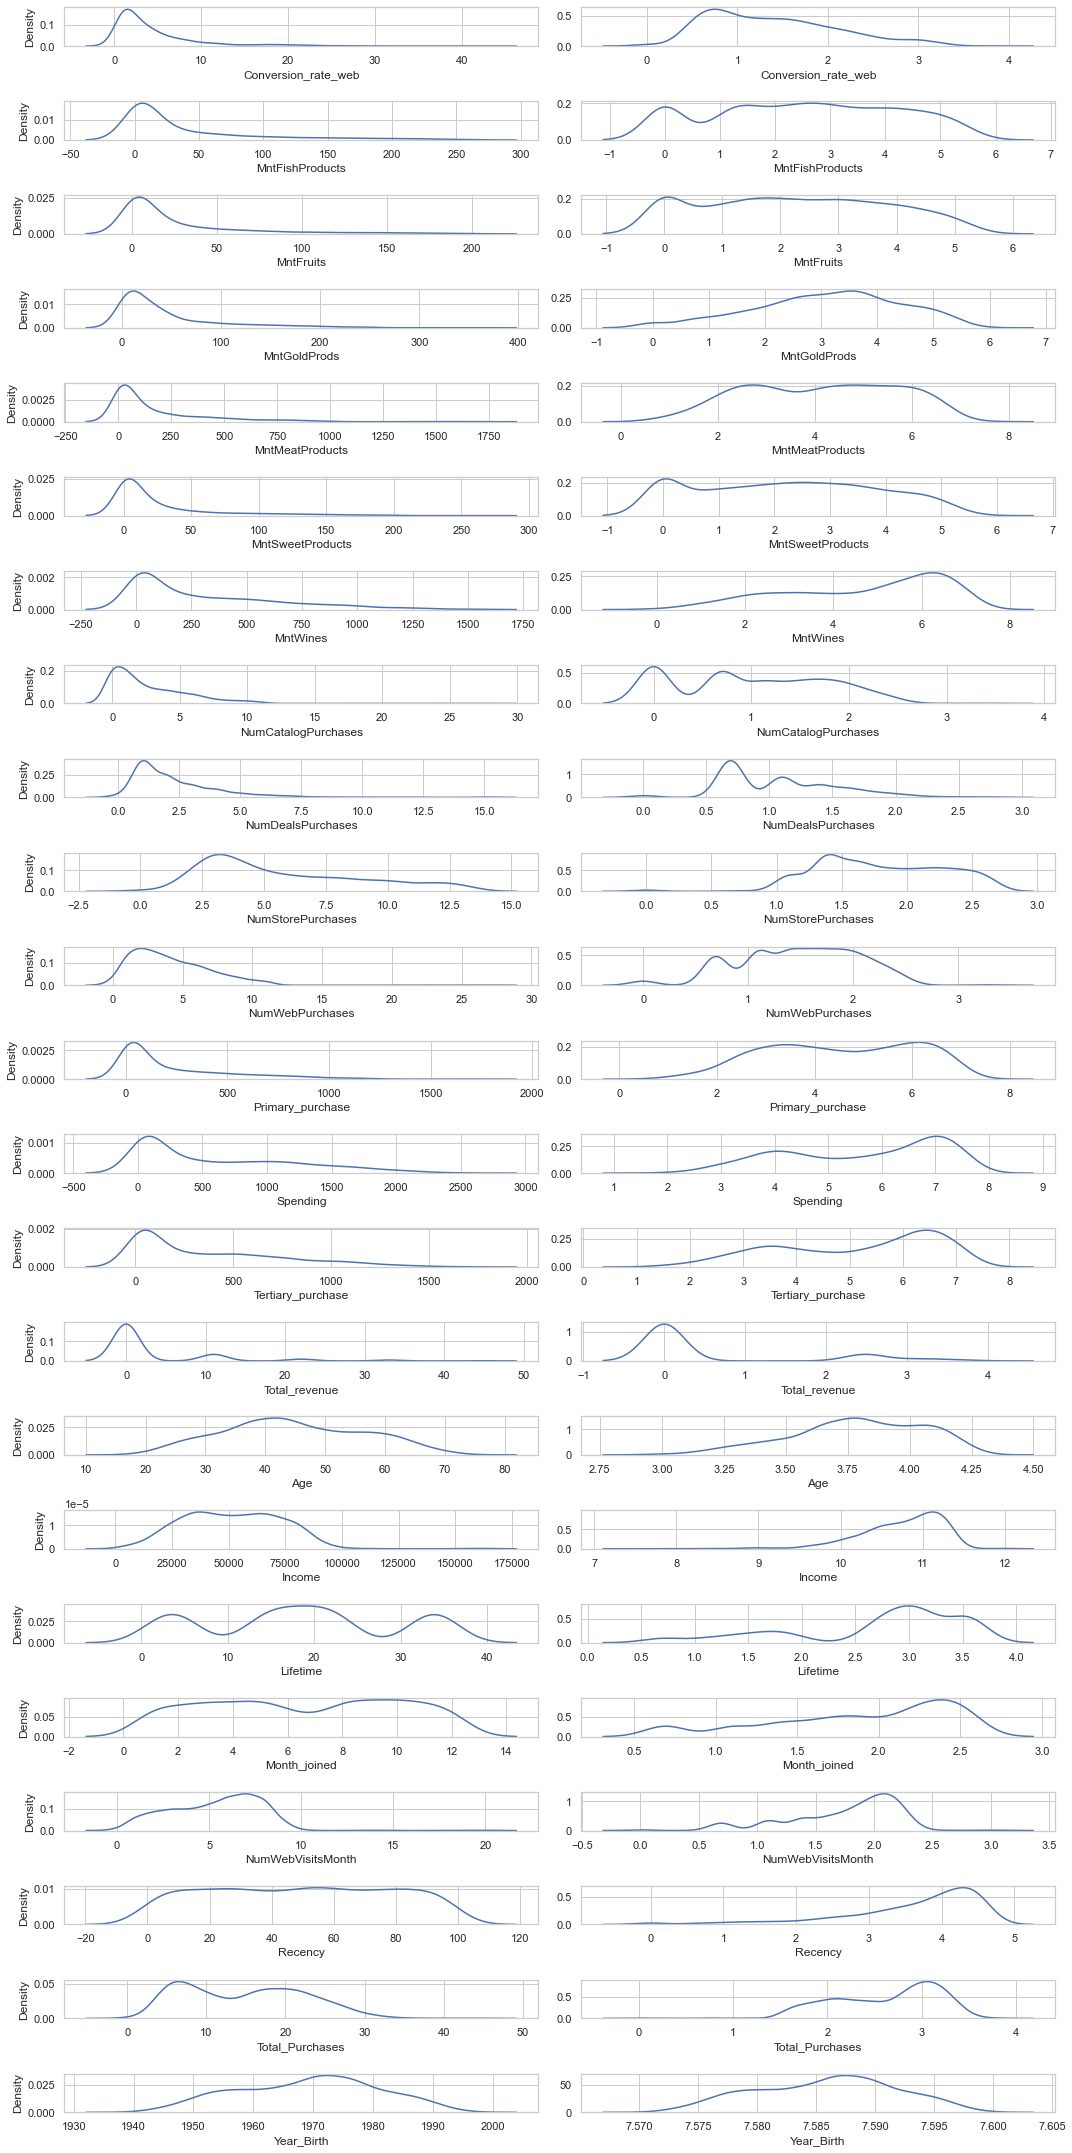

In [63]:
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df_train[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

### **Box-Cox Transformation**

Box-cox transformation works pretty well for many data natures. The below image is the mathematical formula for Box-cox transformation.

![image](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/fae1d9a3-8c7e-486d-aa10-51872c01a177)

All the values of lambda vary from -5 to 5 are considered and the best value for the data is selected. The “Best” value is one that results in the best skewness of the distribution. Log transformation will take place when we have lambda is zero.

- **with Scipy**

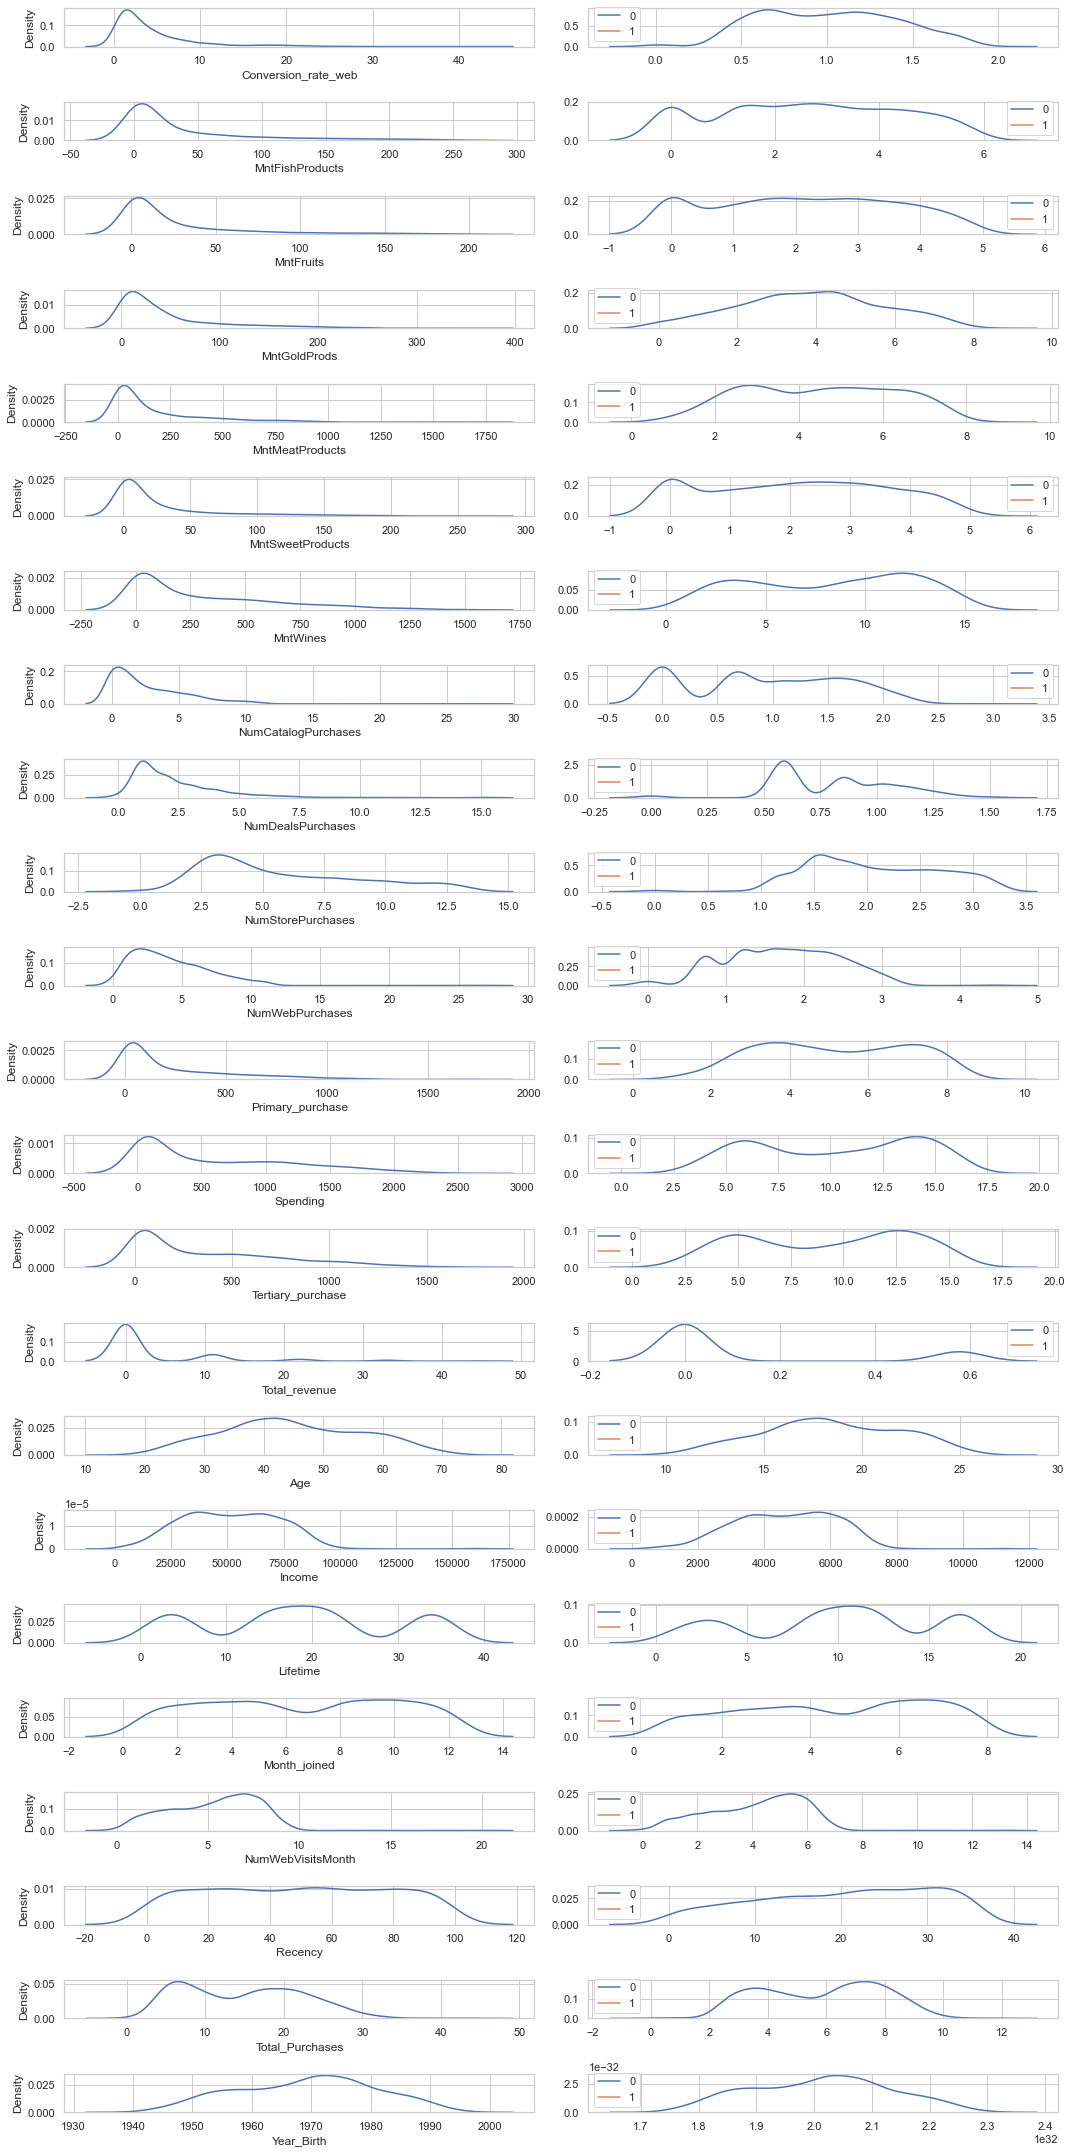

In [64]:
from scipy.stats import boxcox
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(boxcox(df_train[log_cols[i]]+1), warn_singular=False, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

- **with Sklearn**

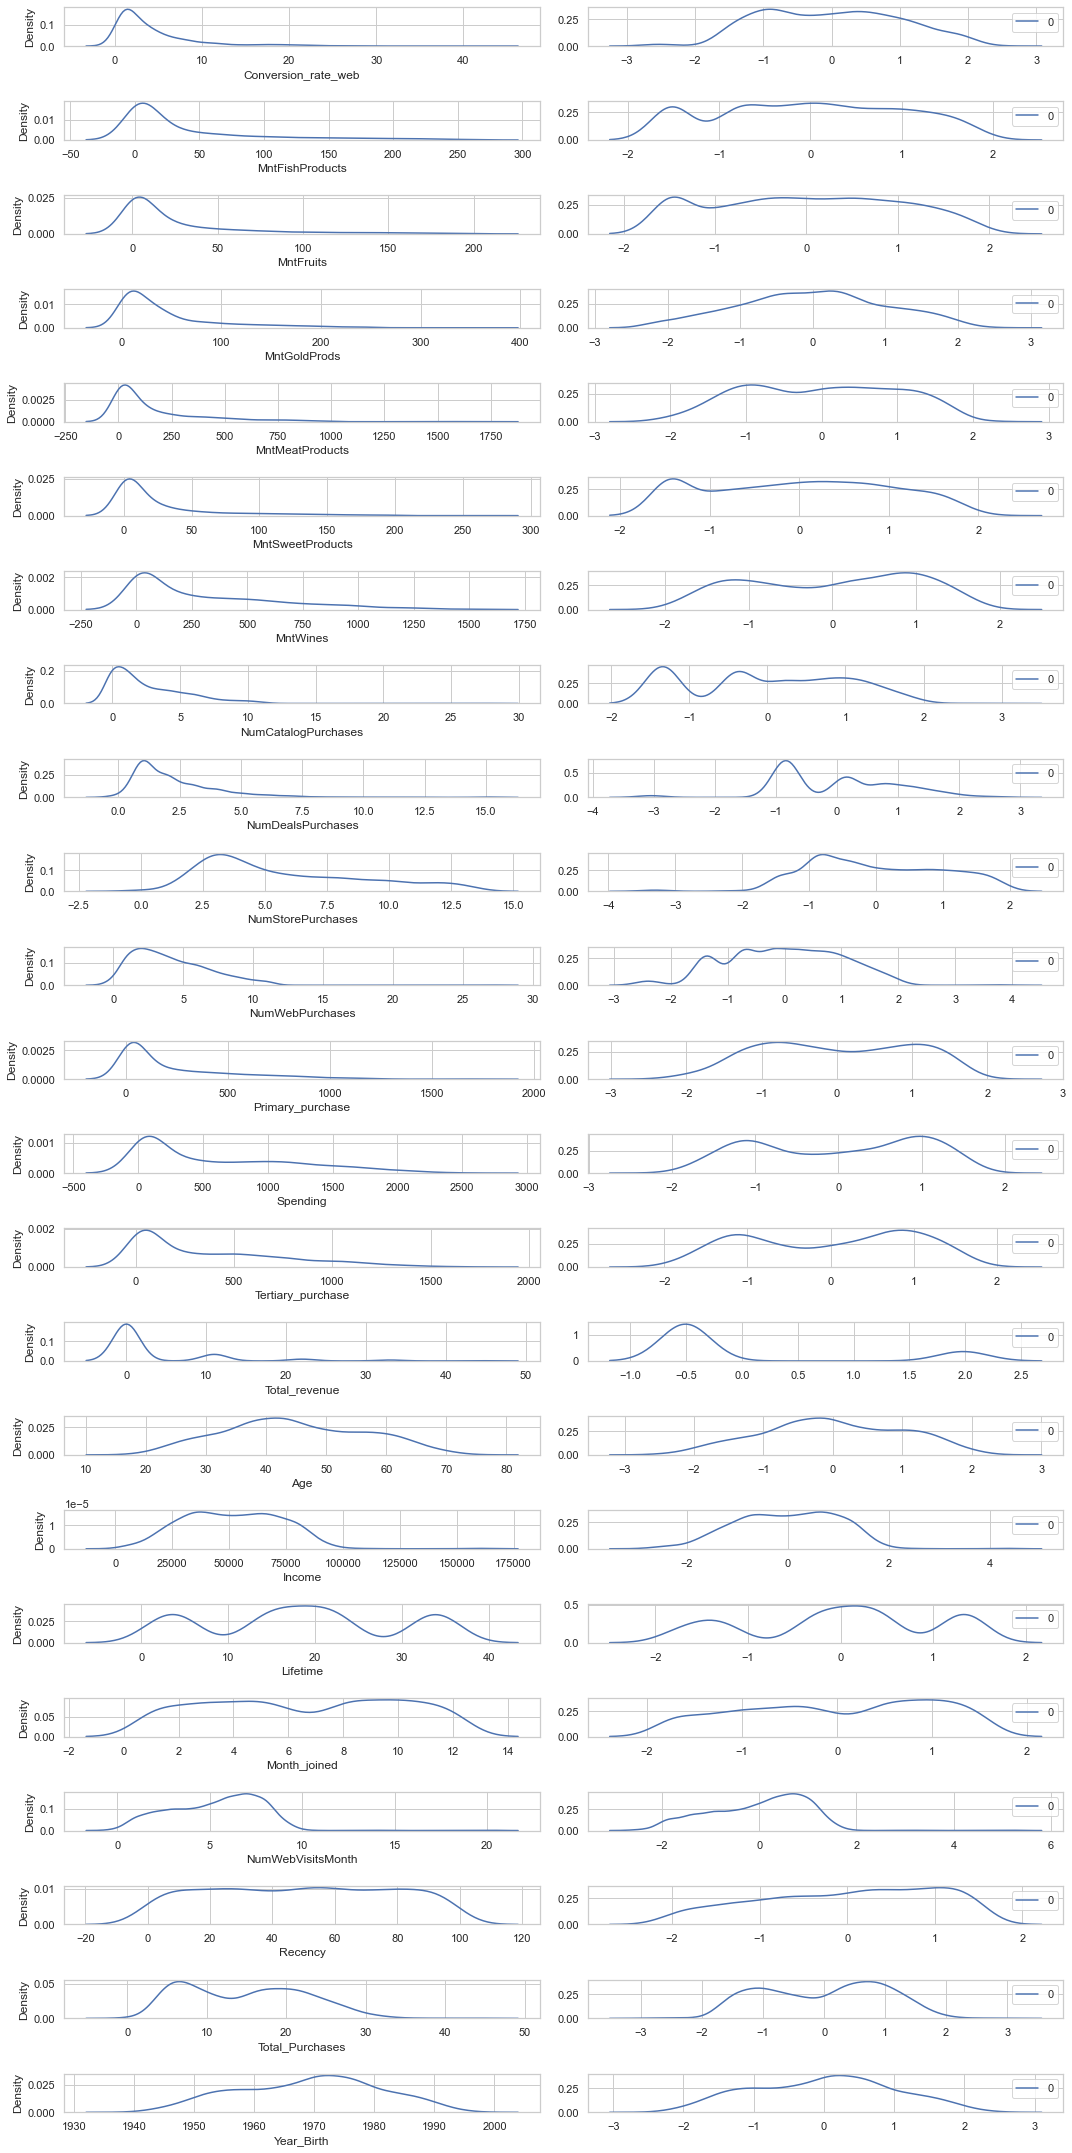

In [65]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='box-cox')
    data = pt.fit_transform(df_train[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

## **Yeo-Johnson Transformation**

- The advantage of the Yeo-Johnson transformation over the box-cox transformation is that, by default, the input (or parameter) of the Yeo-Johnson transformation can be a negative value. Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive.

- This is a huge advantage over the box-cox transformation since we don’t have to generate strictly positive values before applying the transformation.

- It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

<img src="https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/93654477-b936-48a0-be29-94d7d6c71764"  width="300" height="100">

- **with scipy**

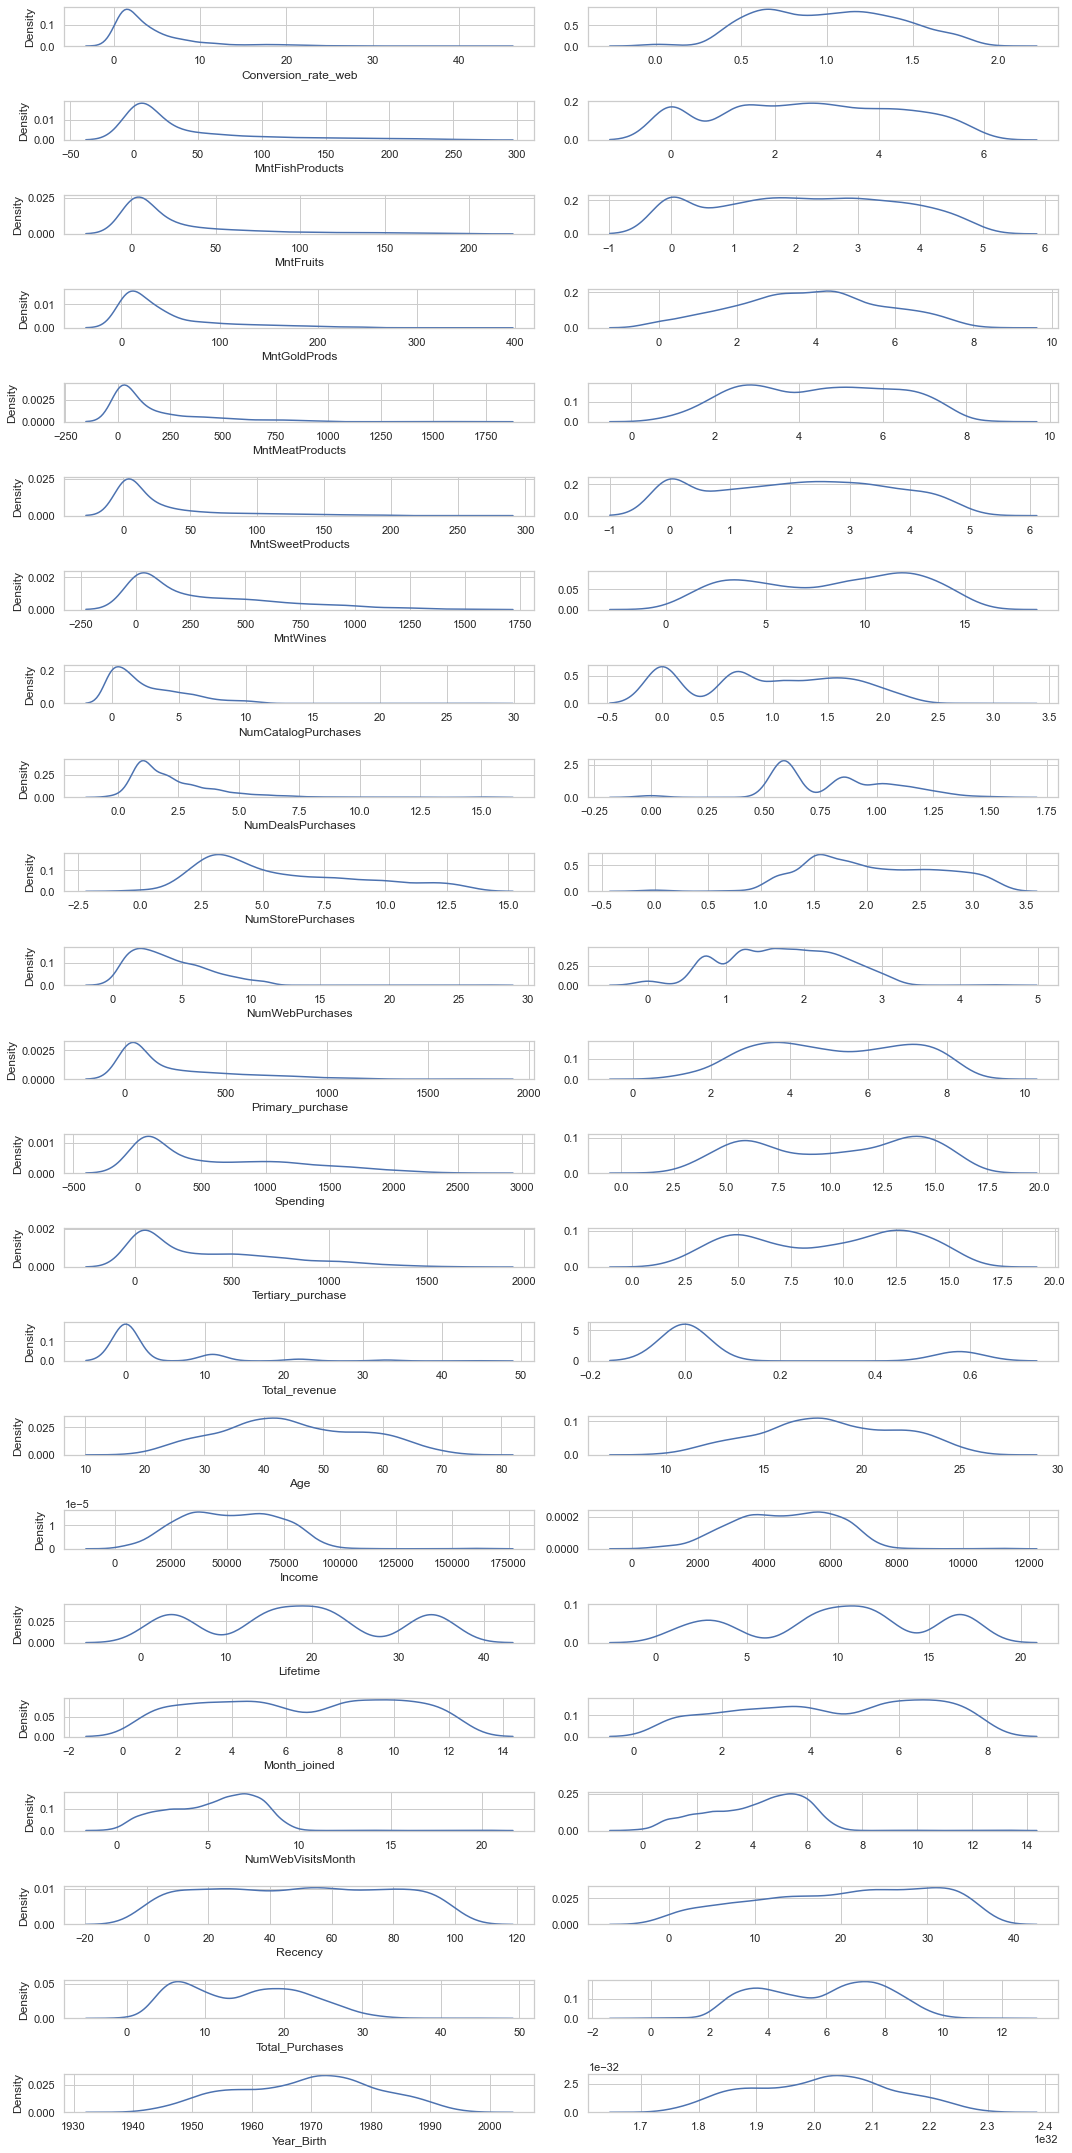

In [66]:
from scipy.stats import yeojohnson

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    data, fitted_lambda = yeojohnson(df_train[log_cols[i]],lmbda=None)
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

- **with sklearn**

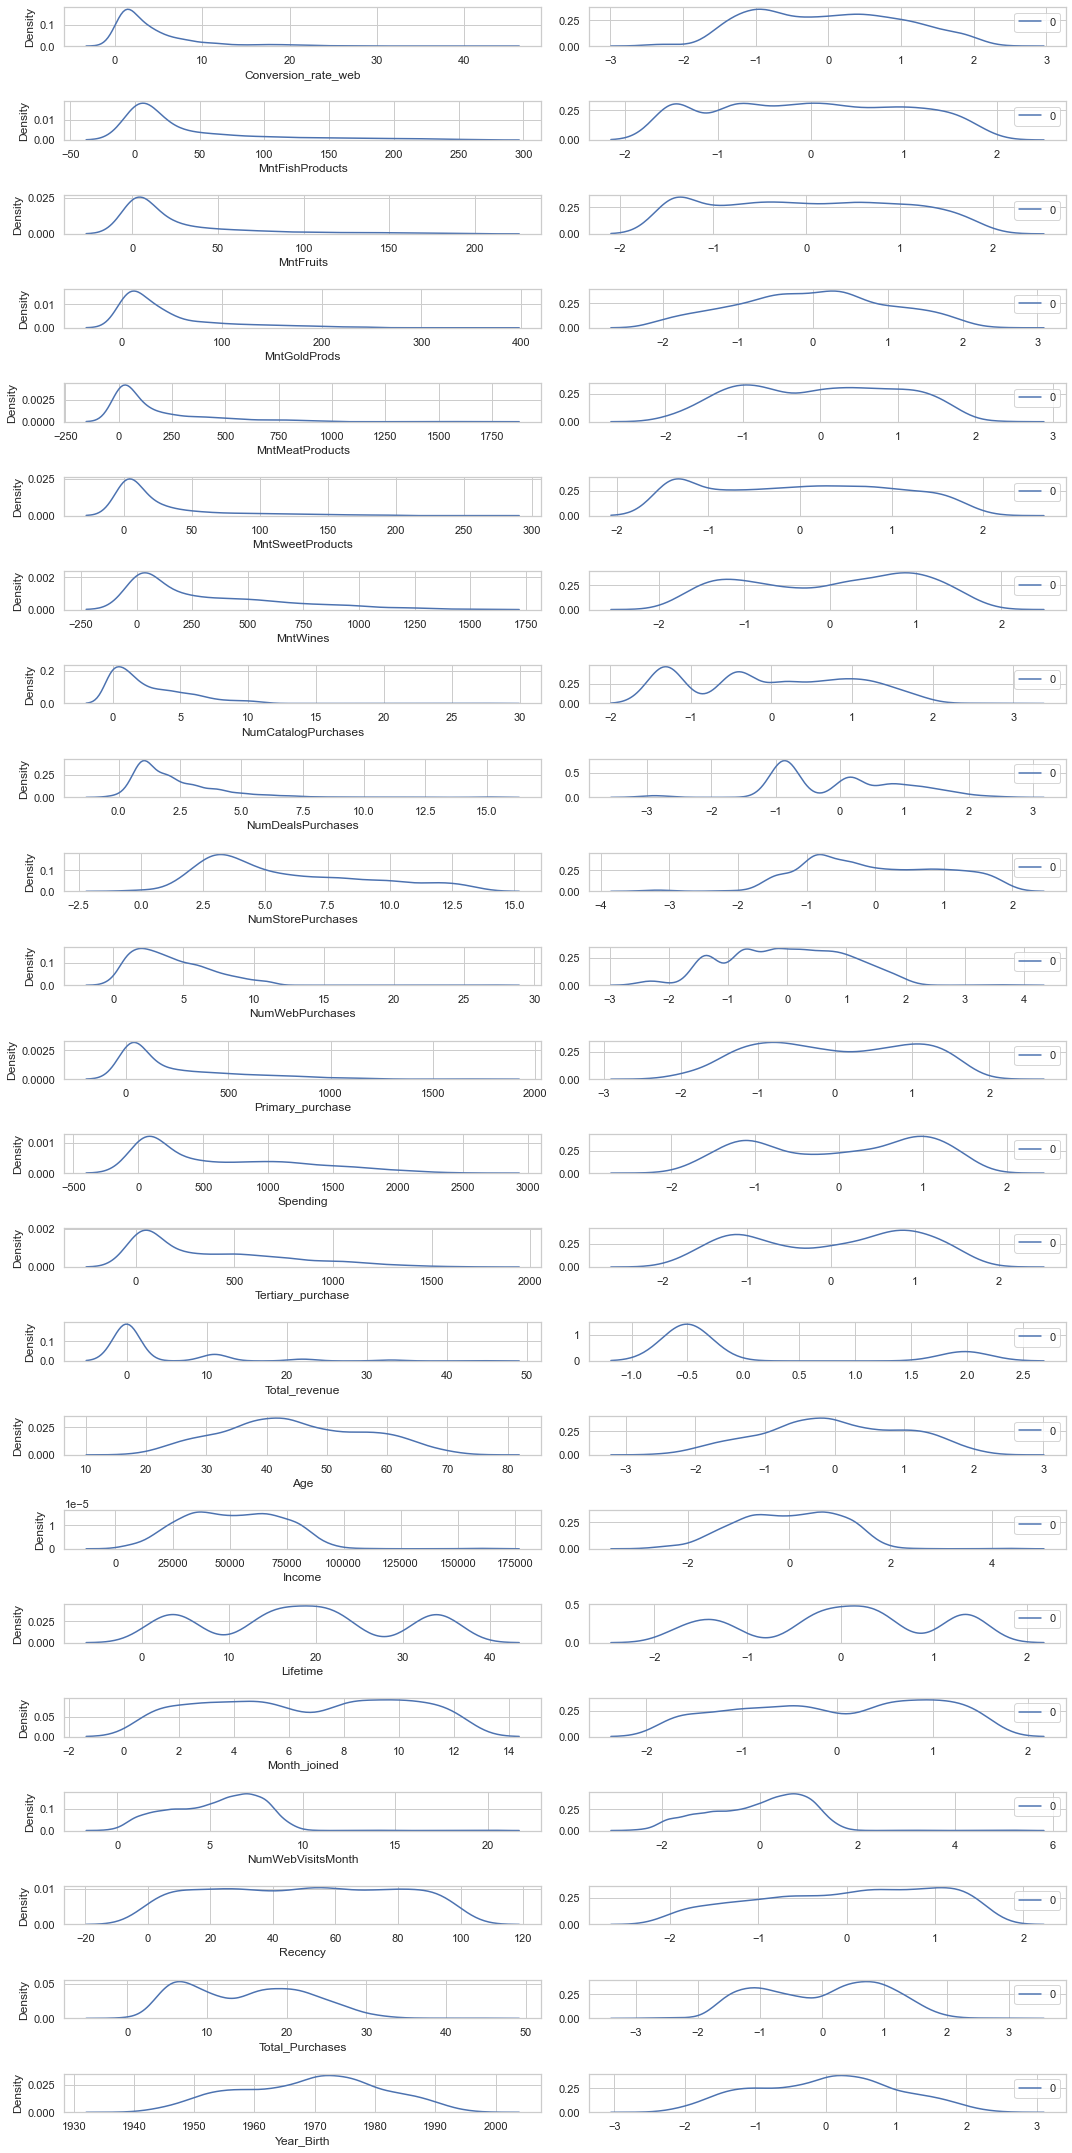

In [67]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='yeo-johnson')
    data = pt.fit_transform(df_train[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [68]:
# Train
pt = PowerTransformer(method='yeo-johnson')
df_train[log_cols] = pt.fit_transform(df_train[log_cols])
df_train[log_cols].describe()

Conversion_rate_web  MntFishProducts  MntFruits  MntGoldProds  \
count                 1679             1679       1679          1679   
mean                -0.000           -0.000      0.000        -0.000   
std                  1.000            1.000      1.000         1.000   
min                 -2.568           -1.520     -1.472        -2.117   
25%                 -0.843           -0.710     -0.728        -0.676   
50%                 -0.022           -0.005     -0.009         0.011   
75%                  0.762            0.831      0.829         0.676   
max                  2.397            1.854      1.893         2.474   

       MntMeatProducts  MntSweetProducts  MntWines  NumCatalogPurchases  \
count             1679              1679      1679                 1679   
mean             0.000             0.000    -0.000                0.000   
std              1.000             1.000     1.000                1.000   
min             -2.122            -1.435    -1.981               -1.340   
25%             -0.850            -0.971    -0.913               -1.340   
50%              0.033             0.002     0.125                0.158   
75%              0.851             0.806     0.878                0.808   
max              2.228             2.027     1.821                2.834   

       NumDealsPurchases  NumStorePurchases  NumWebPurchases  \
count               1679               1679             1679   
mean               0.000             -0.000            0.000   
std                1.000              1.000            1.000   
min               -3.040             -3.302           -2.394   
25%               -0.837             -0.854           -0.717   
50%                0.148             -0.045            0.177   
75%                0.738              0.810            0.810   
max                2.668              1.798            3.842   

       Primary_purchase  Spending  Tertiary_purchase  Total_revenue    Age  \
count              1679      1679               1679           1679   1679   
mean              0.000    -0.000             -0.000          0.000  0.000   
std               1.000     1.000              1.000          1.000  1.000   
min              -2.339    -2.071             -1.975         -0.505 -2.534   
25%              -0.823    -0.975             -0.978         -0.505 -0.732   
50%              -0.046     0.126              0.124         -0.505 -0.027   
75%               0.891     0.921              0.874         -0.505  0.801   
max               2.043     1.765              1.855          2.005  2.326   

       Income  Lifetime  Month_joined  NumWebVisitsMonth  Recency  \
count    1679      1679          1679               1679     1679   
mean    0.000    -0.000         0.000             -0.000   -0.000   
std     1.000     1.000         1.000              1.000    1.000   
min    -2.845    -1.812        -1.715             -2.393   -2.033   
25%    -0.751    -0.408        -1.002             -0.936   -0.788   
50%     0.034     0.052        -0.090              0.297    0.128   
75%     0.791     0.562         0.979              0.682    0.854   
max     4.353     1.491         1.474              5.127    1.542   

       Total_Purchases  Year_Birth  
count             1679        1679  
mean             0.000      -0.000  
std              1.000       1.000  
min             -2.834      -2.370  
25%             -0.861      -0.800  
50%              0.141       0.042  
75%              0.837       0.743  
max              2.885       2.420

In [69]:
# Test
df_test[log_cols] = pt.transform(df_test[log_cols])
df_test[log_cols].describe()

Conversion_rate_web  MntFishProducts  MntFruits  MntGoldProds  \
count                  560              560        560           560   
mean                 0.032           -0.034     -0.026         0.025   
std                  1.000            1.002      1.032         0.970   
min                 -2.568           -1.520     -1.472        -2.117   
25%                 -0.778           -0.710     -0.999        -0.676   
50%                 -0.018           -0.029     -0.009         0.026   
75%                  0.749            0.780      0.810         0.725   
max                  2.141            1.852      1.887         2.085   

       MntMeatProducts  MntSweetProducts  MntWines  NumCatalogPurchases  \
count              560               560       560                  560   
mean            -0.036             0.015     0.002                0.014   
std              1.012             1.019     1.021                1.033   
min             -2.515            -1.435    -1.981               -1.340   
25%             -0.887            -0.971    -0.931               -1.340   
50%              0.005             0.002     0.139                0.158   
75%              0.791             0.926     0.888                0.808   
max              2.228             1.860     1.801                2.834   

       NumDealsPurchases  NumStorePurchases  NumWebPurchases  \
count                560                560              560   
mean              -0.046              0.030           -0.053   
std                1.027              0.989            0.988   
min               -3.040             -3.302           -2.394   
25%               -0.837             -0.854           -0.717   
50%                0.148             -0.045           -0.223   
75%                0.738              0.810            0.810   
max                2.533              1.798            1.904   

       Primary_purchase  Spending  Tertiary_purchase  Total_revenue    Age  \
count               560       560                560            560    560   
mean             -0.034    -0.012              0.003          0.037  0.121   
std               1.019     1.017              1.018          1.027  1.045   
min              -2.339    -1.923             -1.975         -0.505 -2.423   
25%              -0.871    -1.035             -0.978         -0.505 -0.552   
50%              -0.046     0.131              0.158         -0.505  0.058   
75%               0.877     0.906              0.863         -0.505  0.960   
max               2.043     1.765              1.841          2.005  5.477   

       Income  Lifetime  Month_joined  NumWebVisitsMonth  Recency  \
count     560       560           560                560      560   
mean    0.076    -0.100        -0.096             -0.052    0.000   
std     1.259     0.972         1.002              0.932    0.976   
min    -2.354    -1.812        -1.715             -2.393   -2.033   
25%    -0.658    -1.141        -1.002             -0.510   -0.749   
50%     0.045     0.052        -0.090              0.297    0.095   
75%     0.807     0.480         0.723              0.682    0.854   
max    18.479     1.491         1.474              1.427    1.542   

       Total_Purchases  Year_Birth  
count              560         560  
mean            -0.005      -0.122  
std              1.025       1.048  
min             -2.834      -5.526  
25%             -1.032      -0.964  
50%              0.141      -0.044  
75%              0.837       0.566  
max              2.079       2.323

In [70]:
df_train.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   387       0.566       Basic        Married  -2.354        0         0   
1  3537       1.013  Graduation        Married  -0.947        1         0   
2  3075       0.215         PhD        Married   0.425        0         0   
3  4220       0.042         PhD        Married   0.421        0         1   
4  4472       0.042         PhD       Divorced  -0.713        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13    0.410    -1.414      0.396           -1.063           -0.054   
1  2012-08-17    0.348    -0.802     -0.537           -0.456           -0.880   
2  2013-09-11    0.030    -0.052      0.772            0.620            0.286   
3  2013-11-02   -0.710    -0.380     -1.472           -0.969           -1.520   
4  2014-06-27   -0.413    -0.931     -1.472           -1.238           -0.377   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -0.971        -0.287             -0.837           -0.717   
1             0.002        -1.150              0.738           -0.223   
2             0.842        -2.117             -0.837           -0.223   
3            -0.971        -2.117             -0.837           -0.717   
4            -0.704        -0.202             -0.837           -1.373   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              1.059             0   
1               -1.340             -0.414              1.059             0   
2                0.808              0.557             -1.863             0   
3               -0.378             -0.854             -0.936             0   
4               -0.378             -0.854             -1.384             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age Age_group  Has_child  Dependents  Lifetime  \
0              3         11 -0.552     Adult          0           0     1.417   
1              3         11 -1.009     Adult          1           1     1.192   
2              3         11 -0.199     Adult          0           0     0.312   
3              3         11 -0.027     Adult          1           1     0.480   
4              3         11 -0.027     Adult          1           1    -1.141   

   Spending  Primary_purchase  Tertiary_purchase  Total_Purchases  Total_Cmp  \
0    -1.052            -0.593             -1.258           -1.214          0   
1    -0.913            -0.626             -0.954           -0.545          0   
2     0.100             0.546             -0.154            0.141          0   
3    -0.859            -1.224             -0.656           -1.032          0   
4    -1.087            -1.183             -0.954           -1.214          0   

   Ever_Accept  Total_revenue Income_sgmt  Conversion_rate_web  Month_joined  \
0            0         -0.505         Low               -1.296         1.229   
1            0         -0.505         Low               -0.810         0.460   
2            0         -0.505      Medium                1.694         0.723   
3            0         -0.505      Medium               -0.143         1.229   
4            0         -0.505      Medium                0.135        -0.090   

   Recency_sgmt  Response  
0             2         0  
1             2         0  
2             2         0  
3             3         0  
4             3         0

## Feature Encoding (Categoric)


In [71]:
#cek unique value
for x in cat_str: 
    unq = list(df_all[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== Education =====
['Basic', 'Graduation', 'PhD', 'Master']

===== Marital_Status =====
['Married', 'Divorced', 'Single']

===== Age_group =====
['Adult', 'Senior Adult', 'Young Adult']

===== Income_sgmt =====
['Low', 'Medium', 'High']



In [72]:
cat_str

['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']

In [73]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

df_train['Education'] = df_train['Education'].map(map_edu)
print("Education (Train) = ", np.sort(df_train['Education'].unique()))

df_test['Education'] = df_test['Education'].map(map_edu)
print("Education (Test) = ", np.sort(df_test['Education'].unique()))

Education (Train) =  [0 1 2 3]
Education (Test) =  [0 1 2 3]


In [74]:
map_age = {
    'Young Adult' : 0,
    'Adult' : 1,
    'Senior Adult' : 2
}

df_train['Age_group'] = df_train['Age_group'].map(map_age)
print("Age_group (Train) = ", np.sort(df_train['Age_group'].unique()))

df_test['Age_group'] = df_test['Age_group'].map(map_age)
print("Age_group (Test) = ", np.sort(df_test['Age_group'].unique()))

Age_group (Train) =  [0 1 2]
Age_group (Test) =  [0 1 2]


In [75]:
map_income = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

df_train['Income_sgmt'] = df_train['Income_sgmt'].map(map_income)
print("Income_sgmt (Train) = ", np.sort(df_train['Income_sgmt'].unique()))

df_test['Income_sgmt'] = df_test['Income_sgmt'].map(map_income)
print("Income_sgmt (Test) = ", np.sort(df_test['Income_sgmt'].unique()))

Income_sgmt (Train) =  [0 1 2]
Income_sgmt (Test) =  [0 1 2]


In [76]:
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation        Married   71613        0         0   
3  6182        1984  Graduation        Married   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

Using `OneHotEncoder`

In [77]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe_train = pd.DataFrame(
    oh.fit_transform(df_train[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
print(oh.categories_[0])

df_train.drop("Marital_Status", axis=1, inplace=True)

df_train = pd.concat([df_train, df_ohe_train], axis=1)

['Divorced' 'Married' 'Single']


In [78]:
from sklearn.preprocessing import OneHotEncoder

df_ohe_test = pd.DataFrame(
    oh.transform(df_test[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)

df_test.drop("Marital_Status", axis=1, inplace=True)

df_test = pd.concat([df_test, df_ohe_test], axis=1)

In [79]:
df_train.head()

ID  Year_Birth  Education  Income  Kidhome  Teenhome Dt_Customer  \
0   387       0.566          0  -2.354        0         0  2012-11-13   
1  3537       1.013          1  -0.947        1         0  2012-08-17   
2  3075       0.215          3   0.425        0         0  2013-09-11   
3  4220       0.042          3   0.421        0         1  2013-11-02   
4  4472       0.042          3  -0.713        1         0  2014-06-27   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    0.410    -1.414      0.396           -1.063           -0.054   
1    0.348    -0.802     -0.537           -0.456           -0.880   
2    0.030    -0.052      0.772            0.620            0.286   
3   -0.710    -0.380     -1.472           -0.969           -1.520   
4   -0.413    -0.931     -1.472           -1.238           -0.377   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -0.971        -0.287             -0.837           -0.717   
1             0.002        -1.150              0.738           -0.223   
2             0.842        -2.117             -0.837           -0.223   
3            -0.971        -2.117             -0.837           -0.717   
4            -0.704        -0.202             -0.837           -1.373   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              1.059             0   
1               -1.340             -0.414              1.059             0   
2                0.808              0.557             -1.863             0   
3               -0.378             -0.854             -0.936             0   
4               -0.378             -0.854             -1.384             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age  Age_group  Has_child  Dependents  \
0              3         11 -0.552          1          0           0   
1              3         11 -1.009          1          1           1   
2              3         11 -0.199          1          0           0   
3              3         11 -0.027          1          1           1   
4              3         11 -0.027          1          1           1   

   Lifetime  Spending  Primary_purchase  Tertiary_purchase  Total_Purchases  \
0     1.417    -1.052            -0.593             -1.258           -1.214   
1     1.192    -0.913            -0.626             -0.954           -0.545   
2     0.312     0.100             0.546             -0.154            0.141   
3     0.480    -0.859            -1.224             -0.656           -1.032   
4    -1.141    -1.087            -1.183             -0.954           -1.214   

   Total_Cmp  Ever_Accept  Total_revenue  Income_sgmt  Conversion_rate_web  \
0          0            0         -0.505            0               -1.296   
1          0            0         -0.505            0               -0.810   
2          0            0         -0.505            1                1.694   
3          0            0         -0.505            1               -0.143   
4          0            0         -0.505            1                0.135   

   Month_joined  Recency_sgmt  Response  Divorced  Married  Single  
0         1.229             2         0         0        1       0  
1         0.460             2         0         0        1       0  
2         0.723             2         0         0        1       0  
3         1.229             3         0         0        1       0  
4        -0.090             3         0         1        0       0

In [80]:
df_test.head()

ID  Year_Birth  Education  Income  Kidhome  Teenhome Dt_Customer  \
0  10146       0.215          3  -0.554        1         0  2014-03-02   
1      1      -0.718          1   0.297        0         0  2014-06-15   
2   7875      -1.682          1   0.944        0         0  2014-04-29   
3   7807       0.389          1  -0.259        0         1  2012-09-12   
4   4268      -0.882          1   0.119        0         1  2014-06-09   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   -1.077    -0.896     -0.999           -0.969           -1.520   
1   -2.033     0.815     -0.271           -0.005           -0.297   
2   -0.002     1.421     -1.472            1.502            0.740   
3   -0.710    -0.217     -1.472            0.319            0.819   
4    0.128    -0.057     -1.472           -0.691           -1.520   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -1.435        -1.295             -0.837           -1.373   
1            -1.435         0.349             -0.837            1.072   
2             1.068        -2.117             -0.837            0.177   
3             0.128         1.257              1.442            0.516   
4            -0.971        -0.832             -0.837           -0.223   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              0.682             0   
1                0.528              0.557             -0.100             0   
2                1.520              1.798             -1.384             0   
3               -0.378             -0.045              0.297             0   
4               -0.378             -0.414             -0.510             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             1         0   
2             1             1             1             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age  Age_group  Has_child  Dependents  \
0              3         11 -0.199          1          1           1   
1              3         11  0.720          2          0           0   
2              3         11  1.658          2          0           0   
3              3         11 -0.374          1          1           1   
4              3         11  0.881          2          1           1   

   Lifetime  Spending  Primary_purchase  Tertiary_purchase  Total_Purchases  \
0    -1.516    -1.241            -1.183             -1.167           -1.409   
1    -1.141     0.416            -0.155              0.695            0.502   
2    -1.384     1.355             1.328              1.338            1.348   
3     1.267     0.074             0.314              0.032            0.265   
4    -1.141    -0.504            -0.950             -0.275           -0.699   

   Total_Cmp  Ever_Accept  Total_revenue  Income_sgmt  Conversion_rate_web  \
0          0            0         -0.505            1               -1.343   
1          1            1          1.973            1                0.334   
2          3            1          2.002            2                1.579   
3          0            0         -0.505            1                0.007   
4          0            0         -0.505            1               -0.181   

   Month_joined  Recency_sgmt  Response  Divorced  Married  Single  
0        -1.002             4         0         0        1       0  
1        -0.090             4         1         0        0       1  
2        -0.683             2         1         0        1       0  
3         0.723             3         0         0        1       0  
4        -0.090             2         0         0        1       0

## Feature Selection

In [81]:
df_train.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)
df_test.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

## Univariate Selection

In [82]:
# define X and y
X_train = df_train.drop(['Response'], axis=1) #features
y_train = df_train['Response'] #target

- #### **ANOVA F-value**

`ANOVA F-value` estimates the degree of linearity between the input feature (i.e., independent features) and the output feature (i.e., dependent feature). A high F-value indicates a high degree of linearity and a low F-value indicates a low degree of linearity.

Scikit-learn provides two functions to calculate F-value:

1. `sklearn.feature_selection.f_regression` for regression problems
2. `sklearn.feature_selection.f_classif` for classification problems

Disadvantage:

ANOVA F-value only captures the linear relationships between input and output feature.

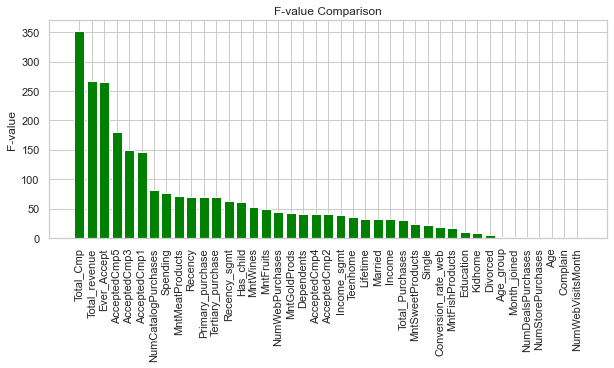

In [83]:
from sklearn.feature_selection import f_classif
feature_names = X_train.columns

# create f_classif object
f_value = f_classif(X_train, y_train)

# print the name and F-value of each feature
# for feature in zip(feature_names, f_value[0]):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "f_value":f_value[0]
}).sort_values("f_value", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="f_value", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

In [84]:
feature_importance = []
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primary_purchase',
 'Tertiary_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4']

#### **Variance Threshold**

Variance Threshold removes the features whose variance is below the pre-defined `threshold` value. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

Advantage:

This can be used for unsupervised learning.

Disadvantage:

Variance Threshold only considers the relationship among the features but not the relationship between input features with the output feature.

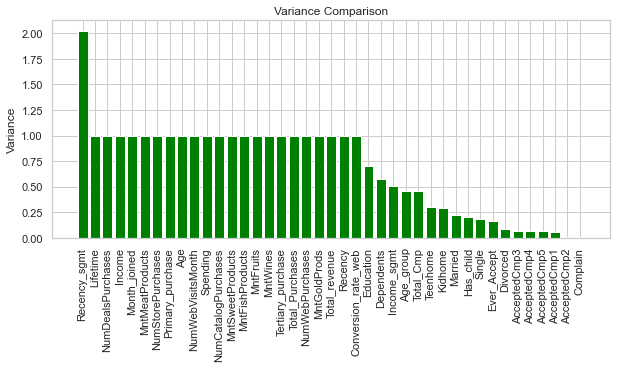

In [85]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
# create VarianceThreshold object
selector = VarianceThreshold(threshold=0.0)
# train and transform
selector.fit_transform(X_train)
# print the name and variance of each feature
# for feature in zip(feature_names, selector.variances_):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "variances":selector.variances_
}).sort_values("variances", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="variances", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

In [86]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primary_purchase',
 'Tertiary_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases']

#### **Mutual information**

Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative and is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Scikit-learn provides two functions to calculate F-value:

- `sklearn.feature_selection.mutual_info_regression` for regression problems
- `sklearn.feature_selection.mutual_info_classif` for classification problems

Advantage:

MI can capture non-linear relationships between input and output feature.

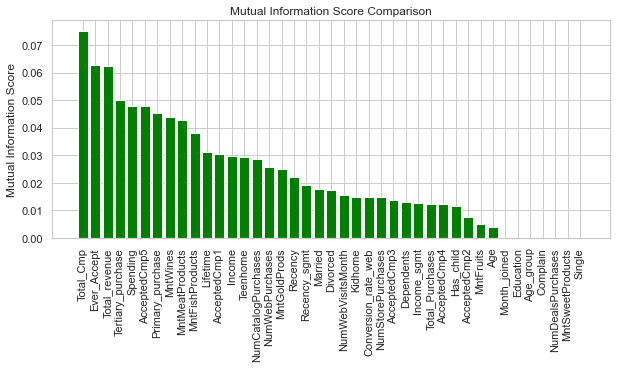

In [87]:
# import mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
# create mutual_info_classif object
MI_score = mutual_info_classif(X_train, y_train, random_state=0)
# Print the name and mutual information score of each feature
# for feature in zip(feature_names, MI_score):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "MI_score":MI_score
}).sort_values("MI_score", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="MI_score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

Mengambil 20 top feature

In [88]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primary_purchase',
 'Tertiary_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases',
 'Teenhome',
 'Married']

#### **Scikit-learn’s SelectKBest**

SelectKBest selects the features using a function (in this case ANOVA F-value) and then "removes all but the k highest scoring features".

Statistical tests can be used to select those features that have the strongest relationship with the output variable. `Mutual information, ANOVA F-test and chi square` are some of the most popular methods of univariate feature selection.

---

ERROR :

`Input X must be non-negative`

The error message you got that:

Tells that: Pearson's chi-square test (goodness of fit) does not apply to negative values. It occurred because the chi-square test assumes frequencies distribution and a frequency can't be a negative number. But, `sklearn.feature_selection.chi2` asserts the input as non-negative.

If data transformation is for some reason not possible (e.g. a negative value is an important factor), then you should pick another statistic to score your features:

```
sklearn.feature_selection.f_classif computes ANOVA f-value
sklearn.feature_selection.mutual_info_classif
```

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# apply SelectKBest class to extract top 10 best features

# computes chi2
# semuanya harus positif
# bestfeatures = SelectKBest(score_func=chi2, k=10)

# computes ANOVA f-value
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score', ascending=False, inplace=True)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs   Score
31            Total_Cmp 352.317
33        Total_revenue 267.068
32          Ever_Accept 265.349
18         AcceptedCmp5 180.364
16         AcceptedCmp3 149.377
19         AcceptedCmp1 145.703
13  NumCatalogPurchases  82.078
27             Spending  75.841
7       MntMeatProducts  71.821
4               Recency  70.215


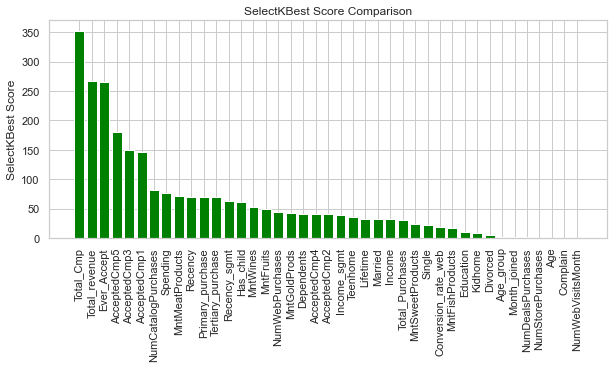

In [90]:
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=featureScores, x="Specs", height="Score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

In [91]:
for i in featureScores["Specs"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primary_purchase',
 'Tertiary_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases',
 'Teenhome',
 'Married']

### **Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02658795 0.02753661 0.00980098 0.01252955 0.0452271  0.02662354
 0.02607036 0.02918418 0.02455012 0.02549218 0.02975164 0.02235603
 0.02539456 0.03080511 0.030638   0.02794912 0.02909193 0.00598529
 0.02577167 0.01725    0.00366674 0.0013714  0.02557089 0.01874281
 0.0119927  0.01477745 0.04003705 0.02854965 0.02935726 0.02515743
 0.02531217 0.03652547 0.03222313 0.04705136 0.01449871 0.02694558
 0.02408561 0.0413705  0.01147513 0.02374509 0.01894794]


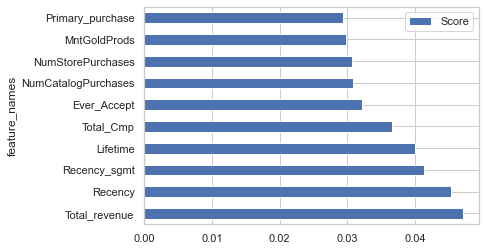

In [92]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)
feat_importances.nlargest(10, "Score").plot(x="feature_names", y="Score", kind='barh')
plt.show()

In [93]:
for i in feat_importances["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primary_purchase',
 'Tertiary_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases',
 'Teenhome',
 'Married',
 'Conversion_rate_web',
 'Education']

### **Correlation Matrix with Heatmap**

- Correlation states how the features are related to each other or the target variable.

- Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

- Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

<AxesSubplot:>

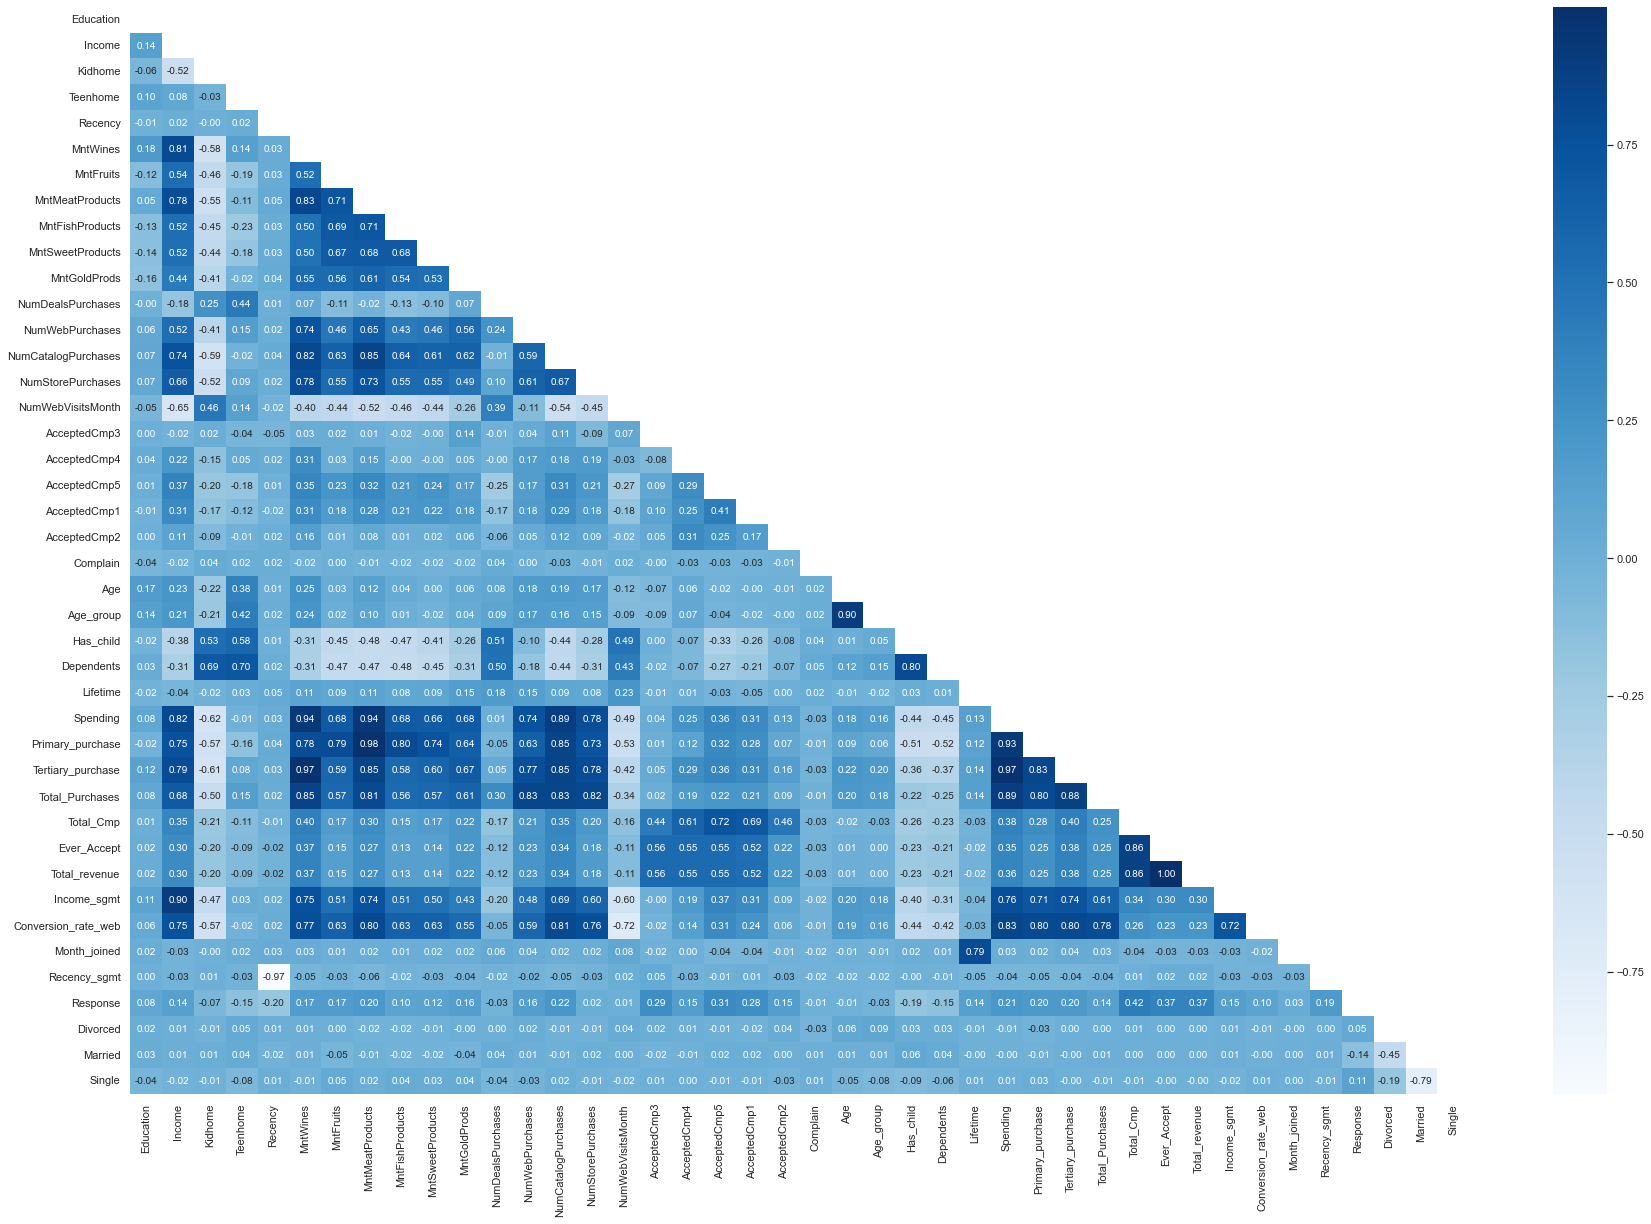

In [94]:
plt.figure(figsize=(30,20))
corr = df_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Checking Correlation with Target (Response)**

In [95]:
corr = df_train.corrwith(df_train["Response"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr.head(10)

index  corr value Corr Type
0             Response           1   Positif
1            Total_Cmp       0.417   Positif
2        Total_revenue       0.371   Positif
3          Ever_Accept       0.370   Positif
4         AcceptedCmp5       0.312   Positif
5         AcceptedCmp3       0.286   Positif
6         AcceptedCmp1       0.283   Positif
7  NumCatalogPurchases       0.216   Positif
8             Spending       0.208   Positif
9      MntMeatProducts       0.203   Positif

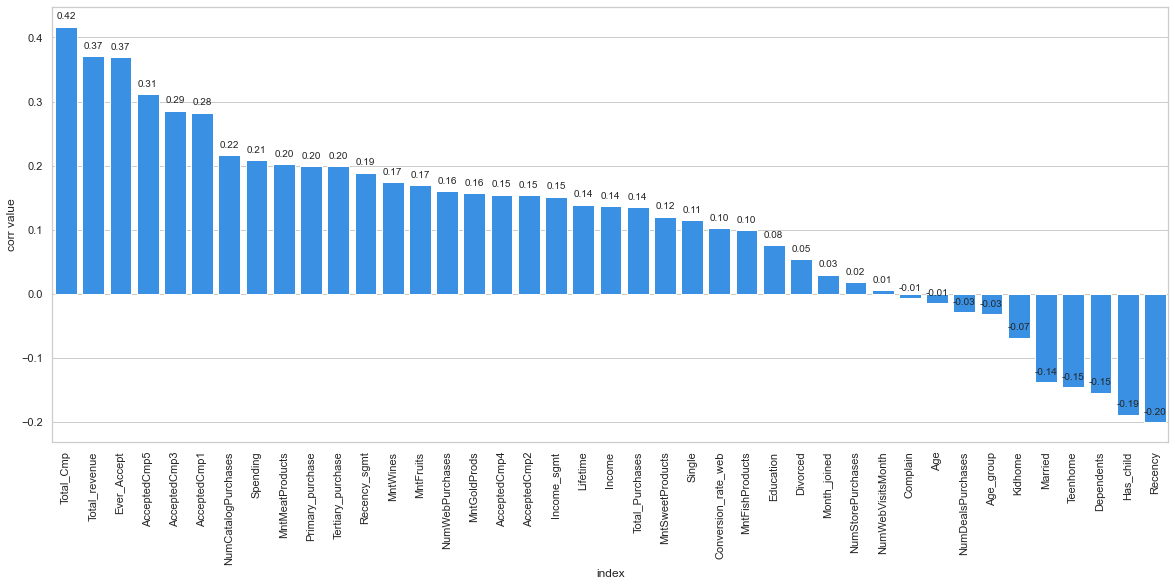

In [96]:
corr = df_train.corrwith(df_train["Response"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [97]:
target = "Response"
high_corr_cols = [i for i in list(corr[corr["corr value"] > 0.15]["index"].values) if i != target]
print(high_corr_cols)

['Total_Cmp', 'Total_revenue', 'Ever_Accept', 'AcceptedCmp5', 'AcceptedCmp3', 'AcceptedCmp1', 'NumCatalogPurchases', 'Spending', 'MntMeatProducts', 'Primary_purchase', 'Tertiary_purchase', 'Recency_sgmt', 'MntWines', 'MntFruits', 'NumWebPurchases', 'MntGoldProds', 'AcceptedCmp4', 'AcceptedCmp2', 'Income_sgmt']


In [98]:
for i in corr["index"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primary_purchase',
 'Tertiary_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases',
 'Teenhome',
 'Married',
 'Conversion_rate_web',
 'Education',
 'AcceptedCmp2',
 'Income_sgmt']

### **Multicollinearity Check (Drop Redundancy)**

- Multicollinearity means independent variables in a model are correlated.
- Multicollinearity among independent variables can reduce the performance of the model.
- Multicollinearity reduces the statistical significance of the independent variables.

#### **1. Correlation Coefficient**

<AxesSubplot:>

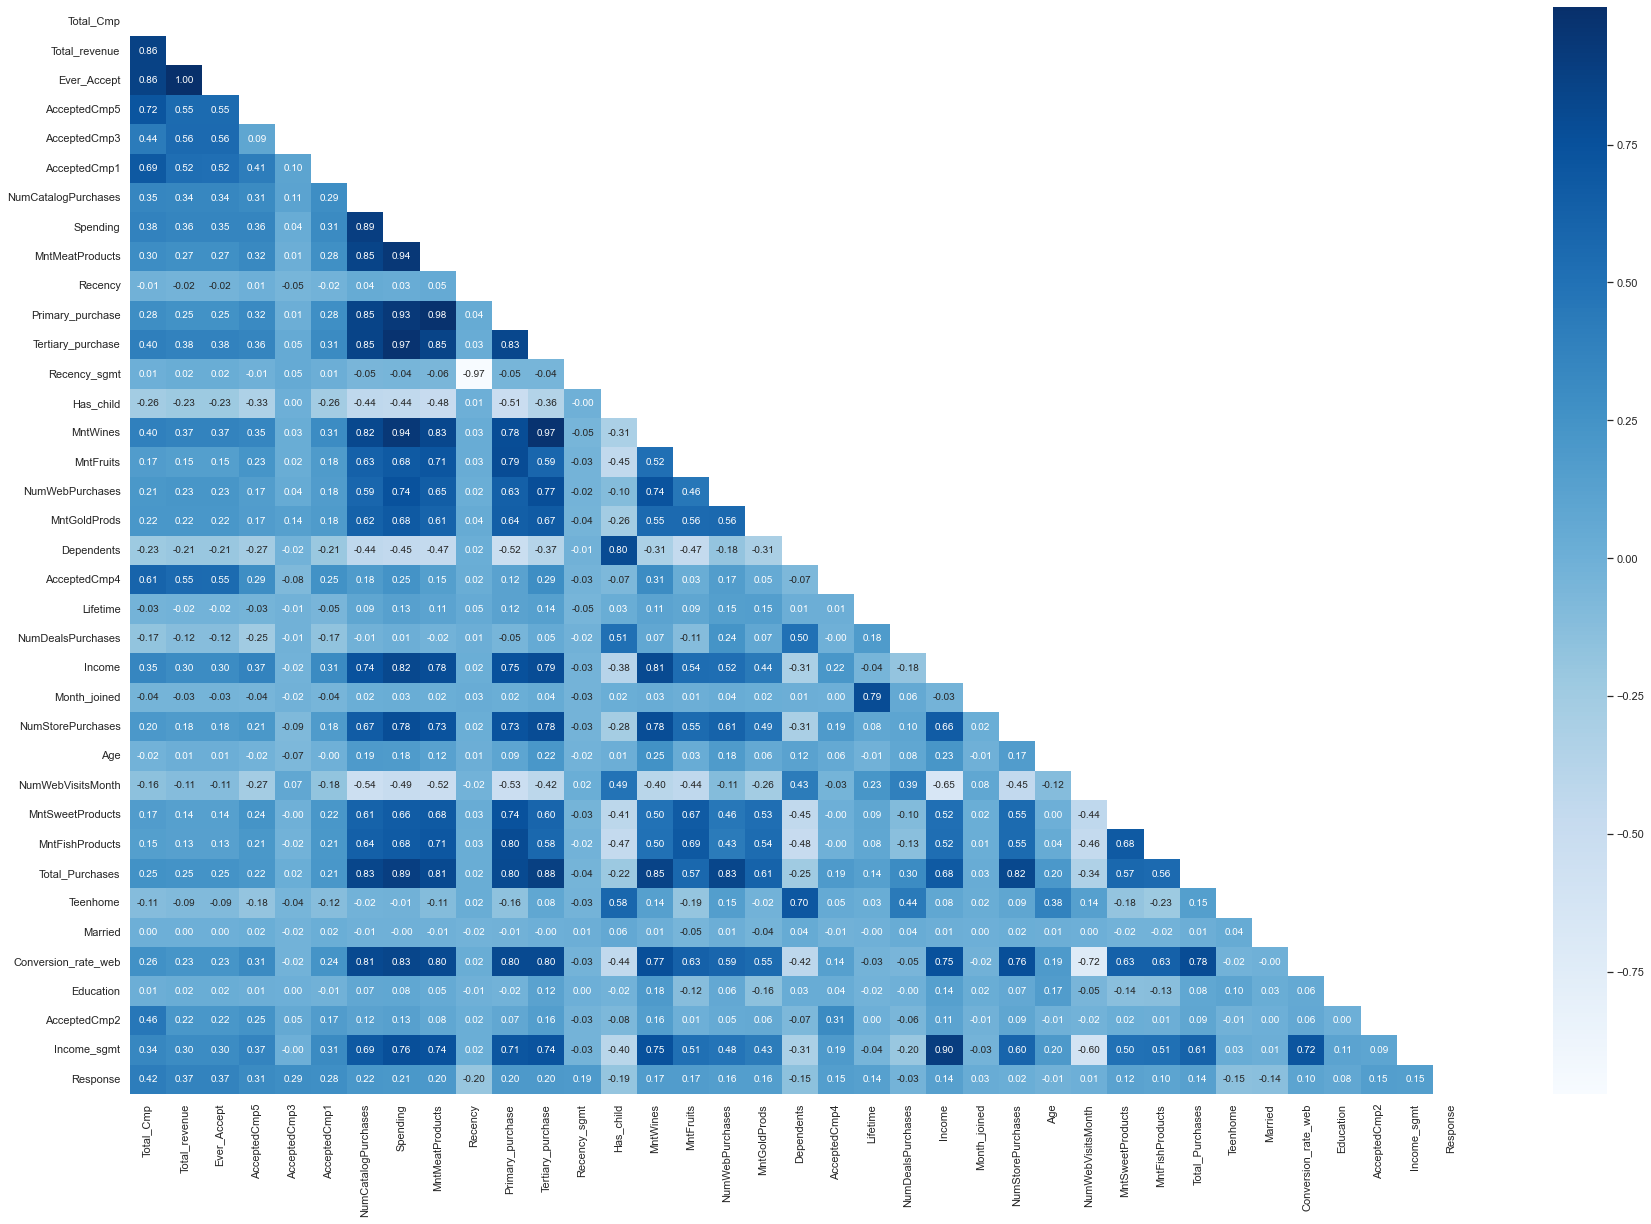

In [99]:
plt.figure(figsize=(30,20))
corr = df_train[feature_importance+["Response"]].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Manampilkan Korelasi Feature > Threshold 0.70**

In [100]:
def corrtarget(x):
    target = "Response"
    return df_train[x].corr(df_train[target])

def corrresp(x):
    target = "Response"
    col1 = x["A"]
    col2 = x["B"]
    
    cor1 = df_train[col1].corr(df_train[target])
    cor2 = df_train[col2].corr(df_train[target])
    
    if cor1 < cor2:
        return col1
    else:
        return col2
    return col1

In [101]:
corr_matrix = df_train[feature_importance].corr()
target = "Response"

# Flatten correlation matrix.
flat_cm = corr_matrix.stack().reset_index()
flat_cm.columns = ['A', 'B', 'correlation']    
flat_cm = flat_cm.loc[flat_cm.correlation < 1, :]
flat_cm = flat_cm.sort_values("correlation", ascending=False)
redundant = flat_cm[flat_cm["correlation"] >= 0.7].reset_index(drop=True)
redundant['A vs Target'] = redundant['A'].apply(lambda x: corrtarget(x))
redundant['B vs Target'] = redundant['B'].apply(lambda x: corrtarget(x))
redundant = redundant.drop_duplicates(subset=["correlation"])
redundant["drop"] = redundant.apply(corrresp, axis=1)
redundant

A                    B  correlation  A vs Target  \
0          Total_revenue          Ever_Accept        1.000        0.371   
2        MntMeatProducts     Primary_purchase        0.978        0.203   
4               MntWines    Tertiary_purchase        0.975        0.174   
6      Tertiary_purchase             Spending        0.970        0.199   
8               Spending      MntMeatProducts        0.938        0.208   
10              MntWines             Spending        0.935        0.174   
12      Primary_purchase             Spending        0.930        0.199   
14                Income          Income_sgmt        0.898        0.137   
16   NumCatalogPurchases             Spending        0.891        0.216   
18       Total_Purchases             Spending        0.890        0.135   
20     Tertiary_purchase      Total_Purchases        0.880        0.199   
22             Total_Cmp        Total_revenue        0.865        0.417   
24             Total_Cmp          Ever_Accept        0.862        0.417   
26       Total_Purchases             MntWines        0.854        0.135   
28   NumCatalogPurchases    Tertiary_purchase        0.852        0.216   
30     Tertiary_purchase      MntMeatProducts        0.851        0.199   
32       MntMeatProducts  NumCatalogPurchases        0.847        0.203   
34      Primary_purchase  NumCatalogPurchases        0.846        0.199   
36       NumWebPurchases      Total_Purchases        0.834        0.160   
38   Conversion_rate_web             Spending        0.834        0.102   
40       Total_Purchases  NumCatalogPurchases        0.831        0.135   
42      Primary_purchase    Tertiary_purchase        0.830        0.199   
44       MntMeatProducts             MntWines        0.825        0.203   
46       Total_Purchases    NumStorePurchases        0.820        0.135   
48                Income             Spending        0.819        0.137   
50   NumCatalogPurchases             MntWines        0.818        0.216   
52       MntMeatProducts      Total_Purchases        0.815        0.203   
54   NumCatalogPurchases  Conversion_rate_web        0.809        0.216   
56                Income             MntWines        0.806        0.137   
58   Conversion_rate_web     Primary_purchase        0.804        0.102   
60   Conversion_rate_web      MntMeatProducts        0.803        0.102   
62      Primary_purchase      Total_Purchases        0.803        0.199   
64   Conversion_rate_web    Tertiary_purchase        0.800        0.102   
66       MntFishProducts     Primary_purchase        0.799        0.099   
68            Dependents            Has_child        0.797       -0.155   
70          Month_joined             Lifetime        0.791        0.030   
72     Tertiary_purchase               Income        0.791        0.199   
74      Primary_purchase            MntFruits        0.790        0.199   
76     NumStorePurchases    Tertiary_purchase        0.785        0.018   
78       Total_Purchases  Conversion_rate_web        0.784        0.135   
80     NumStorePurchases             MntWines        0.784        0.018   
82              Spending    NumStorePurchases        0.784        0.208   
84                Income      MntMeatProducts        0.781        0.137   
86      Primary_purchase             MntWines        0.780        0.199   
88       NumWebPurchases    Tertiary_purchase        0.771        0.160   
90   Conversion_rate_web             MntWines        0.769        0.102   
92              Spending          Income_sgmt        0.765        0.208   
94   Conversion_rate_web    NumStorePurchases        0.764        0.102   
96   Conversion_rate_web               Income        0.752        0.102   
98                Income     Primary_purchase        0.750        0.137   
100          Income_sgmt             MntWines        0.746        0.151   
102  NumCatalogPurchases               Income        0.741        0.216   
104      NumWebPurchases             Spending   

#### **2. VIF (Variance Inflation Factor)**

How do we calculate Multi-collinearity ?

This is where VIF (Variance Inflation Factor) come into the picture. The variance inflation factor (VIF) identifies the strength of correlation among the predictors (features).

Multicollinearity reduces the statistical significance of the independent variables. VIF is used to detect these variables. A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

<img src="https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/31840298-732d-41dd-b9e8-1f07c31e0c7d"  width="200" height="50">

VIF value will always be greater than 1. Here are some rules for VIF

- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

If all the independent variables are orthogonal to each other, then VIF = 1.0. If there is perfect correlation, then VIF = infinity.

In [102]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(df_train[feature_importance])

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df['vif_score'] = round(vif_df['vif_score'], 4)
vif_df.sort_values("vif_score", ascending=False, inplace=True)
vif_df

feature  vif_score
1             Total_Cmp        inf
4          AcceptedCmp5        inf
5          AcceptedCmp3        inf
6          AcceptedCmp1        inf
20         AcceptedCmp4        inf
35         AcceptedCmp2        inf
2         Total_revenue 329948.853
3           Ever_Accept 323927.817
8              Spending    189.158
12    Tertiary_purchase    155.160
11     Primary_purchase    144.555
9       MntMeatProducts     71.290
15             MntWines     62.886
30      Total_Purchases     28.569
13         Recency_sgmt     18.331
10              Recency     18.307
7   NumCatalogPurchases      9.988
23               Income      9.579
33  Conversion_rate_web      8.577
25    NumStorePurchases      6.845
17      NumWebPurchases      6.841
36          Income_sgmt      5.674
19           Dependents      5.432
27    NumWebVisitsMonth      5.366
29      MntFishProducts      5.257
16            MntFruits      4.149
18         MntGoldProds      3.668
21             Lifetime      3.633
14            Has_child      3.578
31             Teenhome      3.542
22    NumDealsPurchases      3.463
28     MntSweetProducts      3.221
24         Month_joined      3.090
26                  Age      1.341
34            Education      1.263
32              Married      1.019

**Drop Redundant Features**

In [103]:
hold = ["Income"]
for i in list(redundant["drop"].unique()):
    if i not in hold:
        feature_importance.remove(i)
    
feature_importance = sorted(feature_importance)
feature_importance

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'Age',
 'Education',
 'Income',
 'Lifetime',
 'Married',
 'MntGoldProds',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'Recency',
 'Recency_sgmt',
 'Teenhome',
 'Total_Cmp']

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan feature selection :
- Drop Unnecessary Feature
- Univariate Selection
    - Anova F-value
    - Variance Threshold
    - Mutual Information
    - SelectKBest
- Feature Importance
- Pearson Correlation
- Multicollinearity Check (Drop Redundancy)

Maka telah didapatkan feature yang akan digunakan pada proses modelling sebagai berikut :

In [104]:
df_train[feature_importance].head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4    Age  Education  \
0             0             0             0             0 -0.552          0   
1             0             0             0             0 -1.009          1   
2             0             0             0             0 -0.199          3   
3             0             0             0             0 -0.027          3   
4             0             0             0             0 -0.027          3   

   Income  Lifetime  Married  MntGoldProds  NumCatalogPurchases  \
0  -2.354     1.417        1        -0.287               -1.340   
1  -0.947     1.192        1        -1.150               -1.340   
2   0.425     0.312        1        -2.117                0.808   
3   0.421     0.480        1        -2.117               -0.378   
4  -0.713    -1.141        0        -0.202               -0.378   

   NumDealsPurchases  NumWebVisitsMonth  Recency  Recency_sgmt  Teenhome  \
0             -0.837              1.059    0.410             2         0   
1              0.738              1.059    0.348             2         0   
2             -0.837             -1.863    0.030             2         0   
3             -0.837             -0.936   -0.710             3         1   
4             -0.837             -1.384   -0.413             3         0   

   Total_Cmp  
0          0  
1          0  
2          0  
3          0  
4          0

## **Handling Imbalanced Data**

**Separate Dataset Xy Train Test**

In [105]:
X_train = df_train.drop(['Response'], axis=1)[feature_importance].reset_index(drop=True) #features
y_train = df_train['Response'].reset_index(drop=True) #target
print(X_train.shape, y_train.shape)

(1679, 17) (1679,)


In [106]:
X_test = df_test.drop(['Response'], axis=1)[feature_importance].reset_index(drop=True) #features
y_test = df_test['Response'].reset_index(drop=True) #target
print(X_test.shape, y_test.shape)

(560, 17) (560,)


In [107]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [108]:
X.shape

(2239, 17)

In [109]:
y.shape

(2239,)

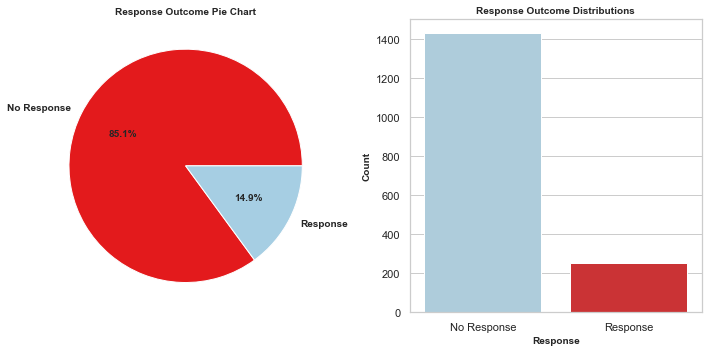

In [110]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['No Response', 'Response'], 
        autopct = '%.1f%%', 
        radius = 1, 
        colors=["#e31a1c", "#a6cee3"],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = y_train.apply(lambda x: "No Response" if x == 0 else "Response")
t = sns.countplot(x=resp, palette=["#a6cee3", "#e31a1c"])
t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

In [111]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # Response
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # No Response

# Undersampling
# us = RandomUnderSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = us.fit_resample(X_train,y_train)

# Oversampling
# os = RandomOverSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = os.fit_resample(X_train,y_train)

# Oversampling SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_balanced_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

X_train = X_balanced_res
y_train = y_balanced_res

Before OverSampling, the shape of X_train: (1679, 17)
Before OverSampling, the shape of y_train: (1679,) 

Before OverSampling, counts of label '1': 251
Before OverSampling, counts of label '0': 1428 

After OverSampling, the shape of X_train: (2142, 17)
After OverSampling, the shape of y_train: (2142,) 

After OverSampling, counts of label '1': 714
After OverSampling, counts of label '0': 1428


## Modelling & Evaluation 

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Support Vector Machine/Classifier
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import shap

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

import re
import warnings
warnings.filterwarnings('ignore')

## Function for Model Evaluation

In [113]:
train_classifier_list = []
train_modelname_list = []
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_fbeta_score_list= [] 
train_f1_score_list= [] 
train_roc_auc_score_list = []
train_cross_val_f1_list = []
train_cross_val_rocauc_list = []

test_classifier_list = []
test_modelname_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_fbeta_score_list= [] 
test_f1_score_list= [] 
test_roc_auc_score_list = []
test_cross_val_f1_list = []
test_cross_val_rocauc_list = []

In [114]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
X_s, y_s = shuffle(X, y, random_state=42)
kf = KFold(10, shuffle=True, random_state=0)

- Function Evaluation for Recap Classification

In [115]:
def eval_classification(model, model_name, save=True):
    # predict train
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)
    
    # predict test
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)
    
    # cross validation
    cv_score_f1 = cross_validate(model, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    cv_score_rocauc = cross_validate(model, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    
    
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    fbeta_s_train = round(fbeta_score(y_train, y_train_pred, beta=0.5), 3)
    f1_s_train = round(f1_score(y_train, y_train_pred), 3)
    csf_score_train = round(cv_score_f1['train_score'].mean(), 3)
    rocauc_score_train = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)
    csr_score_train = round(cv_score_rocauc['train_score'].mean(), 3)
    
    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    fbeta_s_test = round(fbeta_score(y_test, y_test_pred, beta=0.5), 3)
    f1_s_test = round(f1_score(y_test, y_test_pred), 3)
    csf_score_test = round(cv_score_f1['test_score'].mean(), 3)
    rocauc_score_test = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)
    csr_score_test = round(cv_score_rocauc['test_score'].mean(), 3)
    
    if save :
    
        # save report detail train
        train_classifier_list.append(model)
        train_modelname_list.append(model_name)
        train_accuracy_list.append(accuracy_train)
        train_precision_list.append(precision_train)
        train_recall_list.append(recall_train)
        train_fbeta_score_list.append(fbeta_s_train)
        train_f1_score_list.append(f1_s_train)
        train_cross_val_f1_list.append(csf_score_train)
        train_roc_auc_score_list.append(rocauc_score_train)
        train_cross_val_rocauc_list.append(csr_score_train)

        # save report detail test
        test_classifier_list.append(model)
        test_modelname_list.append(model_name)
        test_accuracy_list.append(accuracy_test)
        test_precision_list.append(precision_test)
        test_recall_list.append(recall_test)
        test_fbeta_score_list.append(fbeta_s_test)
        test_f1_score_list.append(f1_s_test)
        test_cross_val_f1_list.append(csf_score_test)
        test_roc_auc_score_list.append(rocauc_score_test)
        test_cross_val_rocauc_list.append(csr_score_test)
    
    
    metrics_summary = pd.DataFrame({
        'Evaluation Metrics' : ["Accuracy", "Precision", "Recall", "F0.5 Score", "F1 Score", "F1 Score (crossval)", "ROC AUC", "ROC AUC (crossval)"],
        'Train' : [accuracy_train, precision_train, recall_train, fbeta_s_train, f1_s_train, csf_score_train, rocauc_score_train, csr_score_train],
        'Test' : [accuracy_test, precision_test, recall_test, fbeta_s_test, f1_s_test, csf_score_test, rocauc_score_test, csr_score_test]})
    
    metrics_summary["Diff Range"] = metrics_summary['Train'] - metrics_summary['Test']
    return metrics_summary.reset_index(drop = True).style.format(precision=3).background_gradient(cmap='Purples')
    
# define function to see the best tuning hyperparameter 
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

- Function Evaluation for Training

In [116]:
def model_eval_train(classifier, model_name, X_train, y_train):
    # predict data train
    y_train_pred = classifier.predict(X_train)
    y_train_pred_prob = classifier.predict_proba(X_train)

    # print classification report
    print('Classification Report Training Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_train, y_train_pred), 3)
    precision = round(precision_score(y_train, y_train_pred), 3)
    recall = round(recall_score(y_train, y_train_pred), 3)
    fbeta_s = round(fbeta_score(y_train, y_train_pred, beta=0.5), 3)
    f1_s = round(f1_score(y_train, y_train_pred), 3)
    rocauc_score = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)
    
    # c_val_score = round(cross_val_score(classifier, X_s, y_s, cv=kf, scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['train_score'].mean(), 3)
    
    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['train_score'].mean(), 3)
    
    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F0.5 Score = {fbeta_s}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y_train, y_train_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

    print("==== Actual Data (Train) =====")
    print("Total =", len(y_train))
    print("No Response =", len(y_train[y_train == 0]))
    print("Response =", len(y_train[y_train == 1]))
    print("==== Predicted Data (Train) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])
    
    c_matrix = confusion_matrix(y_train, y_train_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Greens')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Training Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_train, y_train_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

- Function Evaluation for Testing

In [117]:
def model_eval_test(classifier, model_name, X_test, y_test):

     # predict data test
    y_test_pred = classifier.predict(X_test)
    y_test_pred_prob = classifier.predict_proba(X_test)
    

    # print classification report
    print('Classification Report Testing Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    fbeta_s = round(fbeta_score(y_test, y_test_pred, beta=0.5), 3)
    f1_s = round(f1_score(y_test, y_test_pred), 3)
    rocauc_score = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)
    
    # c_val_score = round(cross_val_score(classifier, X_s, y_s , cv=kf , scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['test_score'].mean(), 3)
    
    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['test_score'].mean(), 3)
    
    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F0.5 Score = {fbeta_s}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')
    
    print(classification_report(y_test, y_test_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    print("==== Actual Data (Test) =====")
    print("Total =", len(y_test))
    print("No Response =", len(y_test[y_test == 0]))
    print("Response =", len(y_test[y_test == 1]))
    print("==== Predicted Data (Test) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])
    
    c_matrix = confusion_matrix(y_test, y_test_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Oranges')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Testing Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

- Function Plotting Feature Importance

In [118]:
def feature_importance_plot(classifier, model_name, X_train=None):
    
    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)
    
    # important features
    # K-Nearest Neighbors/MLP Classifier = No Function/Method to Check Feature Importance
    if model_name == "Logistic Regression":
        # Logistic Regression
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': log_model.coef_[0]
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    elif model_name in ["Naive Bayes", "K-Nearest Neighbors", "MLP Classifier", "Support Vector Machine"]:
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': permutation_importance(classifier, X_test, y_test).importances_mean
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    else: 
        # Decision Tree
        # Random Forest
        # XGBoost Classifier
        # Gradient Boosting Classifier
        ft_imp = classifier.feature_importances_

    importances = pd.Series(ft_imp, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10,7))
    fig = importances.plot(kind ='barh', color='#7faadb', width=0.8)
    plt.title('Features Importance Plot '+model_name+'\n', fontsize=14)

    # Annotate every single Bar with its value, based on it's width   
    N = len(importances)
    thickness = range(1, N+1)
    thick_sum = sum(thickness) 
    barmax = max(importances) 
    for i, p in enumerate(fig.patches):
            fig.annotate("%.2f" % (p.get_width()),
                        (p.get_x() + p.get_width(), p.get_y() + 1),
                        xytext=(5, 15), textcoords='offset points')
            fig.set_ylim(N, -1)
            fig.set_xlim(0,barmax*1.4)

    fig.figure.tight_layout()
    plt.show()

- Function Plotting SHAP

In [119]:
def shap_plot(model, model_name, data=None):
    
    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)
    
    tree = ["Decision Tree", "Random Forest", 
            "XGBoost Classifier", "Gradient Boosting Classifier"]

    shap.initjs()
    
    if model_name in tree:
        
        if model_name in ["XGBoost Classifier", "Gradient Boosting Classifier"] :
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)
            expected = explainer.expected_value
        else:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)[1]
            expected = explainer.expected_value[1]
        

        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values, data, show = False) 
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout() 
        plt.show()

        return shap.force_plot(expected, shap_values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

    else :
        explainer = shap.Explainer(model.predict, data)
        shap_values = explainer(data)

        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values.values, data, show = False) 
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values.values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout() 
        plt.show()

        return shap.force_plot(shap_values.base_values[0], shap_values.values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

### **1. Decision Tree**

Decision tree membagi data berdasarkan serangkaian keputusan yang dibuat pada fitur-fitur. Setiap node internal pada pohon keputusan mewakili keputusan berdasarkan fitur-fitur tersebut, sedangkan daun pohon mewakili label atau kelas hasil klasifikasi.

In [120]:
# train the model
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
print(dt_model)
eval_classification(dt_model, "Decision Tree")

DecisionTreeClassifier(random_state=42)


#### **Performance of Training Model**

Classification Report Training Model (Decision Tree):

Accuracy = 0.997
Precision = 1.0
Recall = 0.99
F0.5 Score = 0.998
F1 Score = 0.995
Cross Val F1 (k=5) = 0.972
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       1.00      0.99      1.00       714

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 707, FP = 0, TN = 1428, FN = 7
Predictly Correct = 2135
Predictly Wrong = 7 



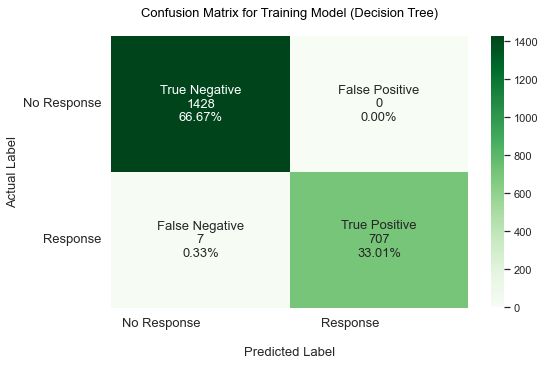

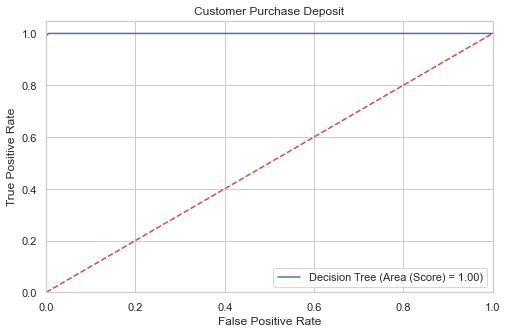

In [121]:
model_eval_train(dt_model, "Decision Tree", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (Decision Tree):



Accuracy = 0.838
Precision = 0.456
Recall = 0.494
F0.5 Score = 0.463
F1 Score = 0.474
Cross Val F1 (k=5) = 0.488
ROC AUC = 0.699
Cross Val ROC AUC (k=5) = 0.718

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       477
           1       0.46      0.49      0.47        83

    accuracy                           0.84       560
   macro avg       0.68      0.70      0.69       560
weighted avg       0.84      0.84      0.84       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 41, FP = 49, TN = 428, FN = 42
Predictly Correct = 469
Predictly Wrong = 91 



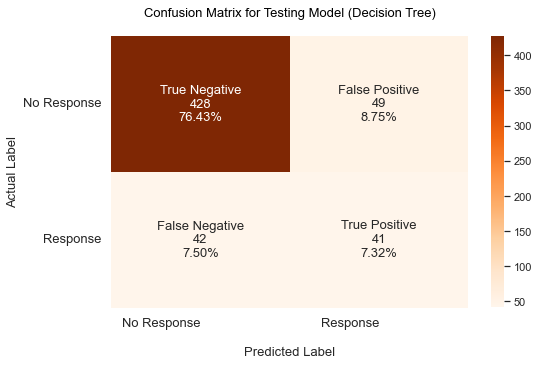

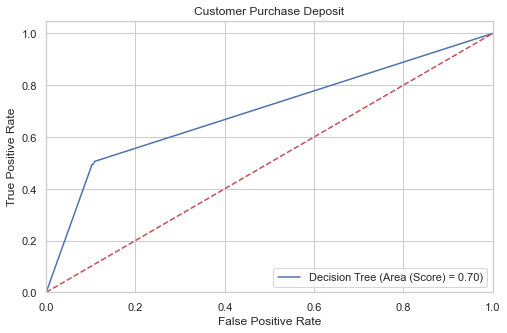

In [122]:
model_eval_test(dt_model, "Decision Tree", X_test, y_test)

In [123]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.67 %
Testing Accuracy: 83.75 %


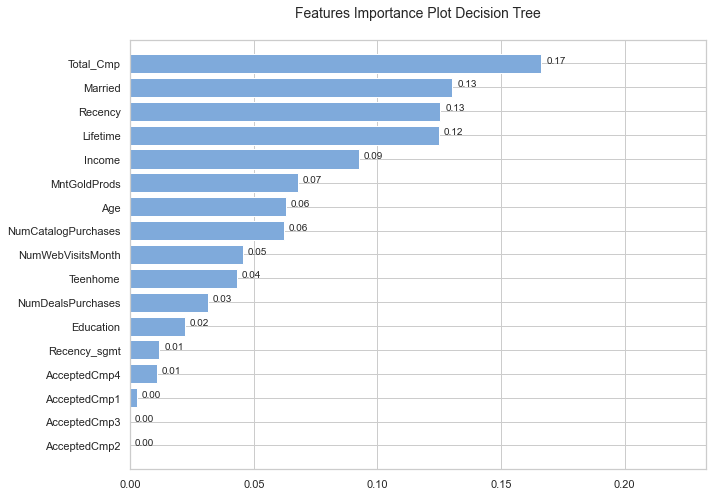

In [124]:
feature_importance_plot(dt_model, "Decision Tree")

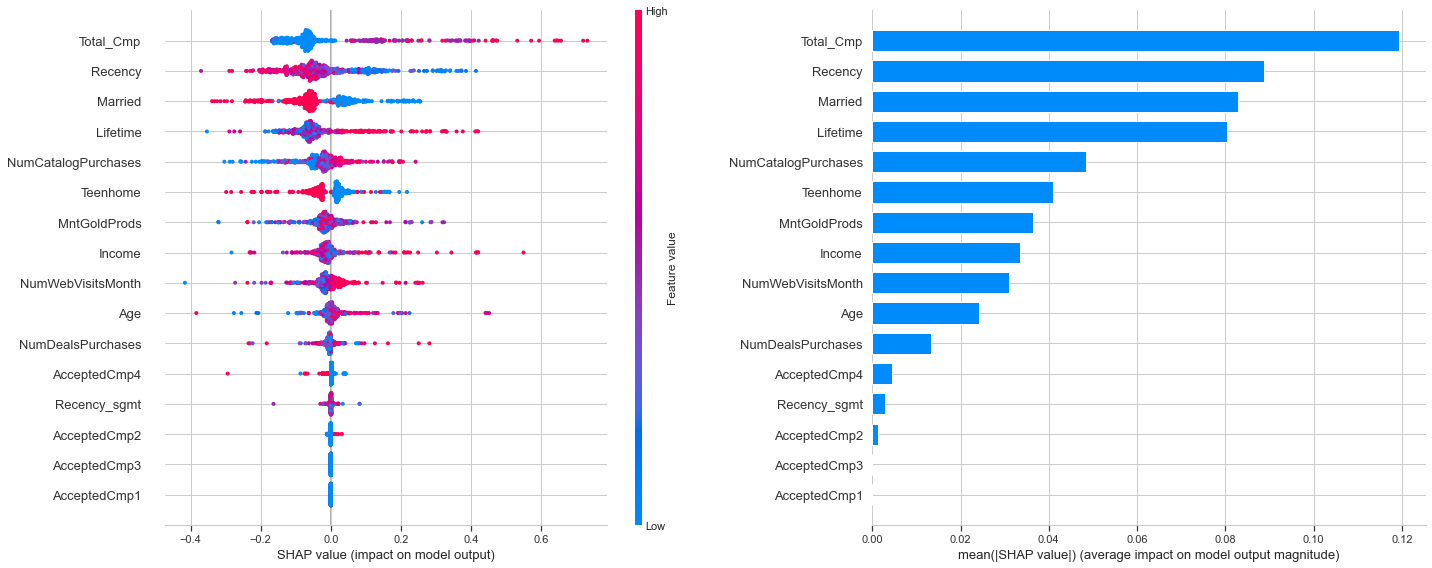

In [157]:
shap_plot(dt_model, "Decision Tree", X_test)

#### **Display the Tree**

**Preparation**

- pip install graphviz
- conda install graphviz
or

You need to run

`conda install python-graphviz`

instead of

`pip install graphviz`

to get these bindings, which also work with conda's Graphviz package.

or

- Download and install graphviz-2.38.msi (use the newest version) from https://graphviz.gitlab.io/_pages/Download/Download_windows.html

- Set the path variable
    - Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit
    - add 'C:\Program Files (x86)\Graphviz2.38\bin'

In [126]:
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = list(X_test.columns),
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision-tree-graph.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### **2. Logistic Regression**

Metode ini digunakan untuk memodelkan hubungan antara variabel independen dan variabel dependen biner atau multi-kategori. Regresi logistik menghasilkan probabilitas kelas sebagai output.

In [127]:
# train the model
log_model = LogisticRegression(solver='lbfgs', max_iter=len(X_train), random_state=42).fit(X_train, y_train)
print(log_model)
eval_classification(log_model, "Logistic Regression")

LogisticRegression(max_iter=2142, random_state=42)


#### **Performance of Training Model**

Classification Report Training Model (Logistic Regression):

Accuracy = 0.813
Precision = 0.75
Recall = 0.66
F0.5 Score = 0.73
F1 Score = 0.702
Cross Val F1 (k=5) = 0.536
ROC AUC = 0.887
Cross Val ROC AUC (k=5) = 0.891

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1428
           1       0.75      0.66      0.70       714

    accuracy                           0.81      2142
   macro avg       0.79      0.77      0.78      2142
weighted avg       0.81      0.81      0.81      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 471, FP = 157, TN = 1271, FN = 243
Predictly Correct = 1742
Predictly Wrong = 400 



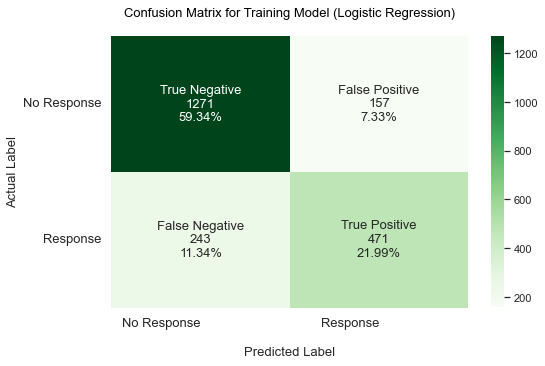

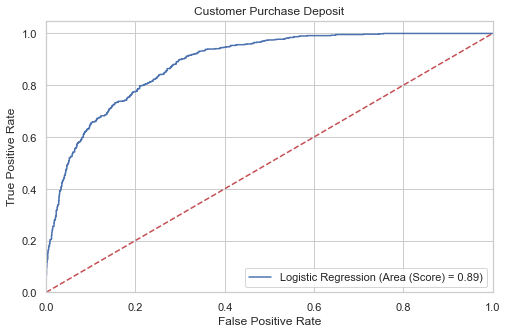

In [128]:
model_eval_train(log_model, "Logistic Regression", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (Logistic Regression):



Accuracy = 0.861
Precision = 0.523
Recall = 0.675
F0.5 Score = 0.548
F1 Score = 0.589
Cross Val F1 (k=5) = 0.51
ROC AUC = 0.9
Cross Val ROC AUC (k=5) = 0.885

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       477
           1       0.52      0.67      0.59        83

    accuracy                           0.86       560
   macro avg       0.73      0.78      0.75       560
weighted avg       0.88      0.86      0.87       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 56, FP = 51, TN = 426, FN = 27
Predictly Correct = 482
Predictly Wrong = 78 



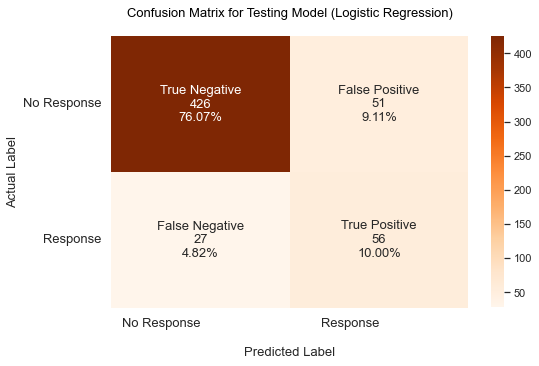

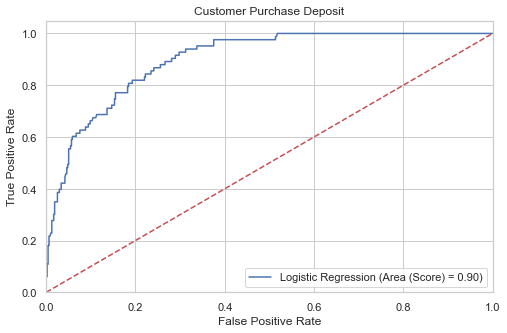

In [129]:
model_eval_test(log_model, "Logistic Regression", X_test, y_test)

In [130]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 81.33 %
Test Accuracy: 86.07 %


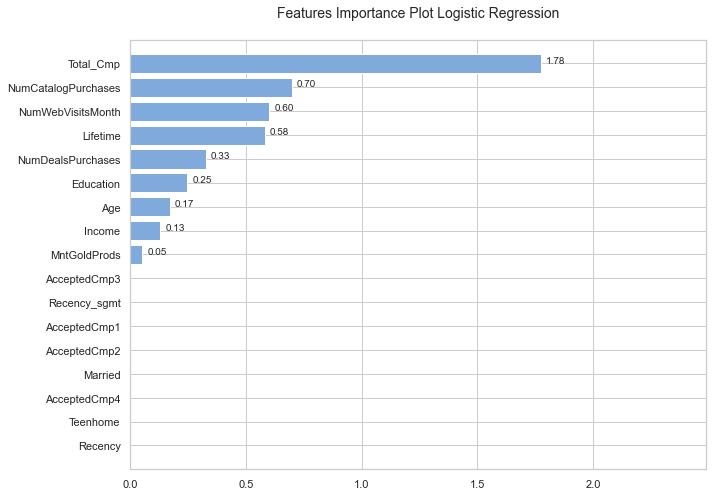

In [131]:
feature_importance_plot(log_model, "Logistic Regression", X_train)

PermutationExplainer explainer: 561it [00:19, 18.43it/s]                         


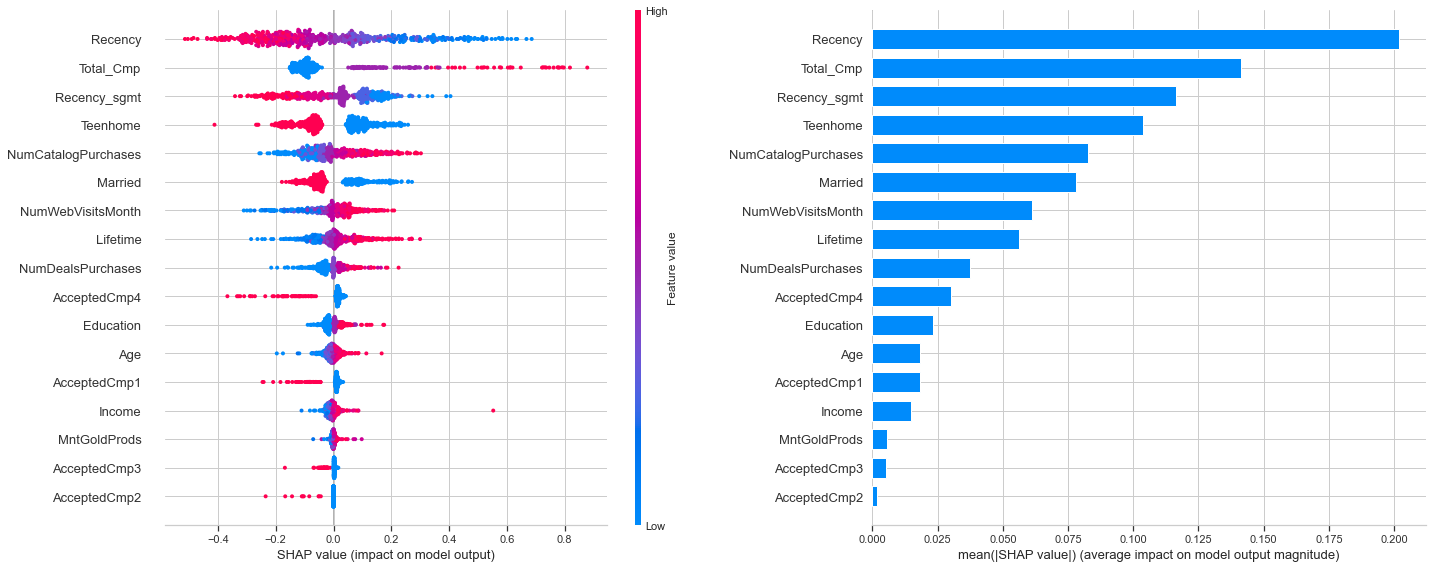

In [132]:
shap_plot(log_model, "Logistic Regression", X_test)

### **3. K-Nearest Neighbors**

Memprediksi label data berdasarkan kelas mayoritas dari K tetangga terdekat dalam ruang fitur. K adalah parameter yang menentukan jumlah tetangga yang akan digunakan dalam klasifikasi.

In [133]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)
eval_classification(knn_model, "K-Nearest Neighbors")

KNeighborsClassifier()


#### **Performance of Training Model**

Classification Report Training Model (K-Nearest Neighbors):

Accuracy = 0.916
Precision = 0.819
Recall = 0.959
F0.5 Score = 0.844
F1 Score = 0.884
Cross Val F1 (k=5) = 0.606
ROC AUC = 0.982
Cross Val ROC AUC (k=5) = 0.949

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1428
           1       0.82      0.96      0.88       714

    accuracy                           0.92      2142
   macro avg       0.90      0.93      0.91      2142
weighted avg       0.92      0.92      0.92      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 685, FP = 151, TN = 1277, FN = 29
Predictly Correct = 1962
Predictly Wrong = 180 



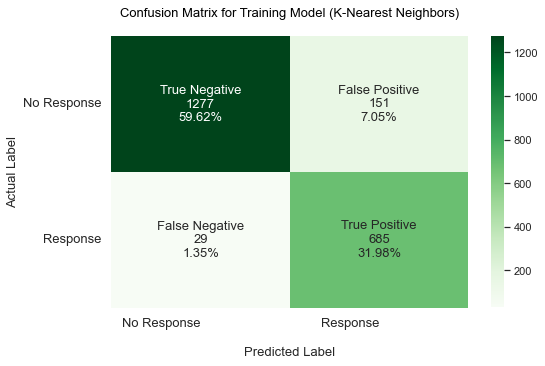

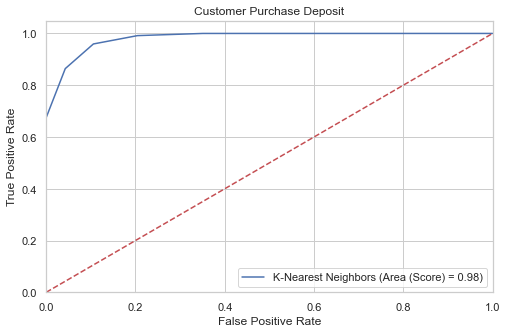

In [134]:
model_eval_train(knn_model, "K-Nearest Neighbors", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (K-Nearest Neighbors):

Accuracy = 0.845
Precision = 0.482
Recall = 0.639
F0.5 Score = 0.507
F1 Score = 0.549
Cross Val F1 (k=5) = 0.399
ROC AUC = 0.843
Cross Val ROC AUC (k=5) = 0.809

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       477
           1       0.48      0.64      0.55        83

    accuracy                           0.84       560
   macro avg       0.71      0.76      0.73       560
weighted avg       0.87      0.84      0.85       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 53, FP = 57, TN = 420, FN = 30
Predictly Correct = 473
Predictly Wrong = 87 



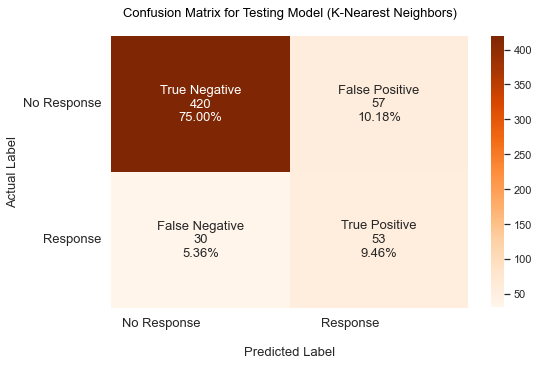

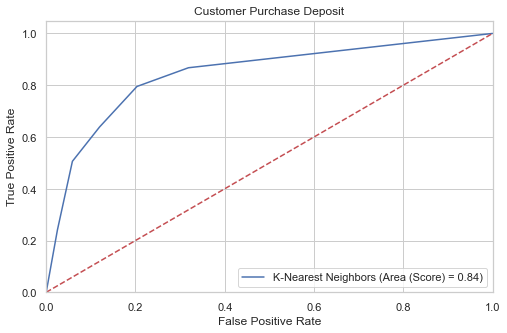

In [135]:
model_eval_test(knn_model, "K-Nearest Neighbors", X_test, y_test)

In [136]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_knn_train))
print("Test Accuracy: {} %".format(acc_knn_test))

Training Accuracy: 91.6 %
Test Accuracy: 84.46 %


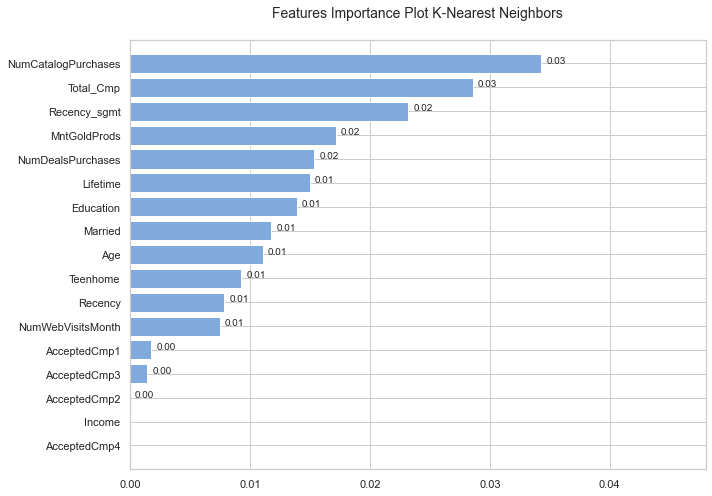

In [137]:
feature_importance_plot(knn_model, "K-Nearest Neighbors", X_train)

In [183]:
# shap_plot(knn_model, "K-Nearest Neighbors", X_test)

### **4. MLP Classifier (Neural Network)**

In [138]:
# train the model
mlp_model = MLPClassifier(random_state=42, max_iter=len(X_train)).fit(X_train, y_train)

eval_classification(mlp_model, "MLP Classifier")

#### **Performance of Training Model**

Classification Report Training Model (MLP Classifier):



Accuracy = 0.995
Precision = 0.992
Recall = 0.993
F0.5 Score = 0.992
F1 Score = 0.992
Cross Val F1 (k=5) = 0.874
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 0.99

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       0.99      0.99      0.99       714

    accuracy                           0.99      2142
   macro avg       0.99      0.99      0.99      2142
weighted avg       0.99      0.99      0.99      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 709, FP = 6, TN = 1422, FN = 5
Predictly Correct = 2131
Predictly Wrong = 11 



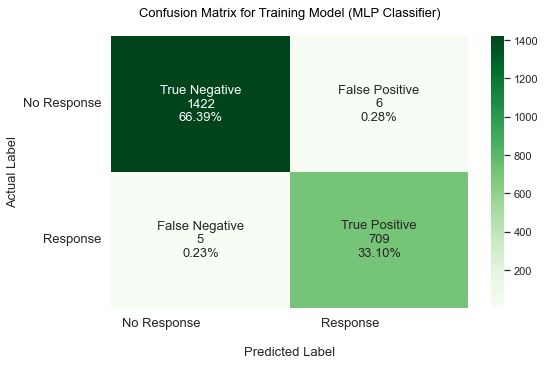

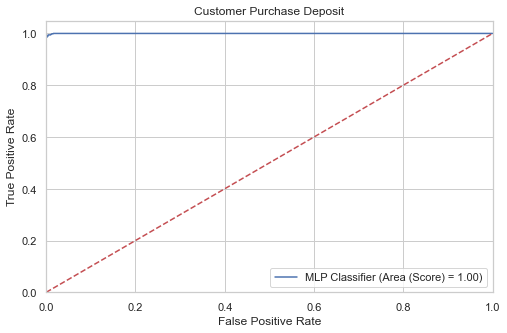

In [139]:
model_eval_train(mlp_model, "MLP Classifier", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (MLP Classifier):



Accuracy = 0.846
Precision = 0.483
Recall = 0.518
F0.5 Score = 0.49
F1 Score = 0.5
Cross Val F1 (k=5) = 0.558
ROC AUC = 0.83
Cross Val ROC AUC (k=5) = 0.887

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       477
           1       0.48      0.52      0.50        83

    accuracy                           0.85       560
   macro avg       0.70      0.71      0.70       560
weighted avg       0.85      0.85      0.85       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 43, FP = 46, TN = 431, FN = 40
Predictly Correct = 474
Predictly Wrong = 86 



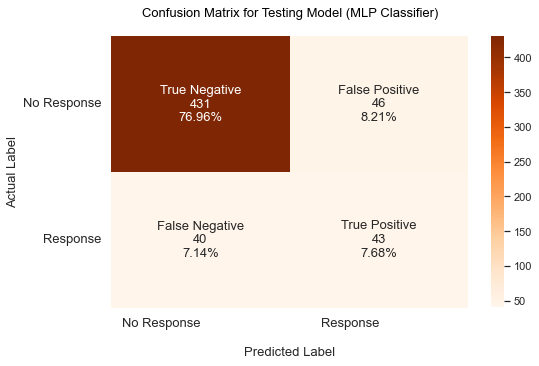

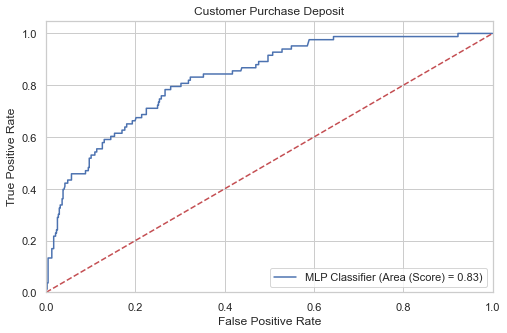

In [140]:
model_eval_test(mlp_model, "MLP Classifier", X_test, y_test)

In [141]:
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 99.49 %
Test Accuracy: 84.64 %


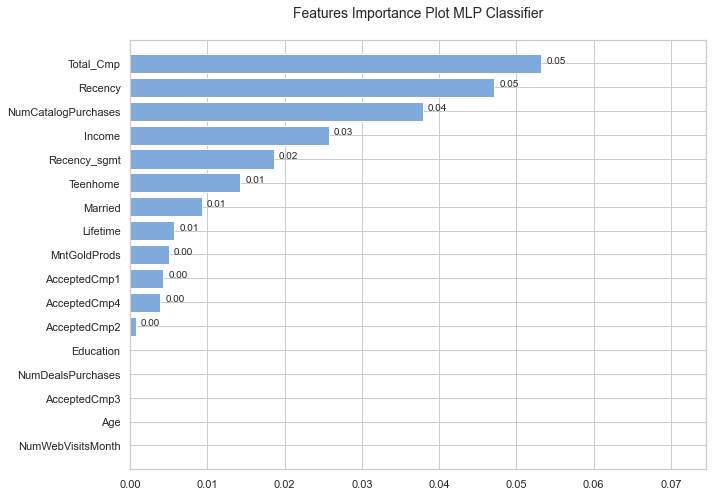

In [142]:
feature_importance_plot(mlp_model, "MLP Classifier", X_train)

PermutationExplainer explainer: 561it [00:33, 11.73it/s]                         


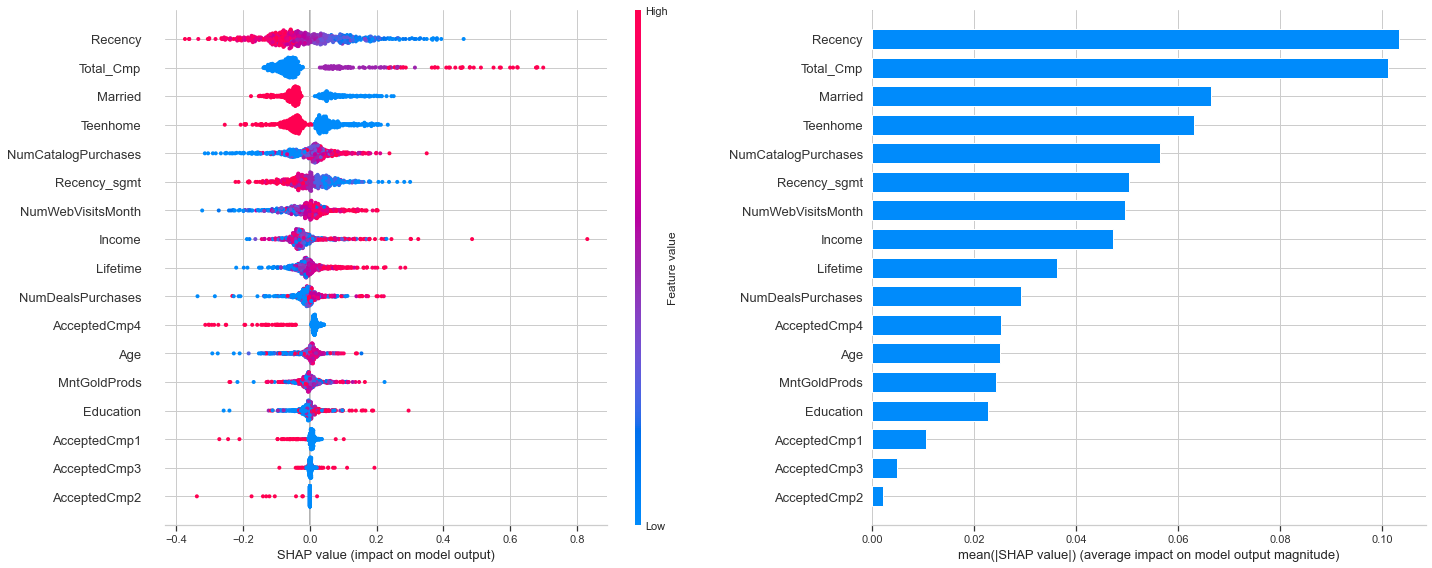

In [143]:
shap_plot(mlp_model, "MLP Classifier", X_test)

### **5. Gradient Boosting Classifier**

In [144]:
# train the model
# gb_model = GradientBoostingClassifier().fit(X_train, y_train)
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, max_depth=13, random_state=42).fit(X_train, y_train)
eval_classification(gb_model, "Gradient Boosting Classifier")

#### **Performance of Training Model**

Classification Report Training Model (Gradient Boosting Classifier):



Accuracy = 0.997
Precision = 1.0
Recall = 0.99
F0.5 Score = 0.998
F1 Score = 0.995
Cross Val F1 (k=5) = 0.972
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       1.00      0.99      1.00       714

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 707, FP = 0, TN = 1428, FN = 7
Predictly Correct = 2135
Predictly Wrong = 7 



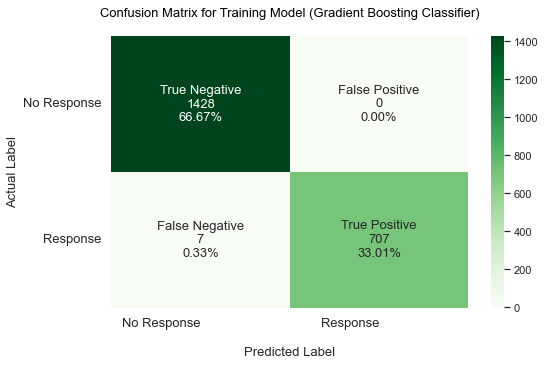

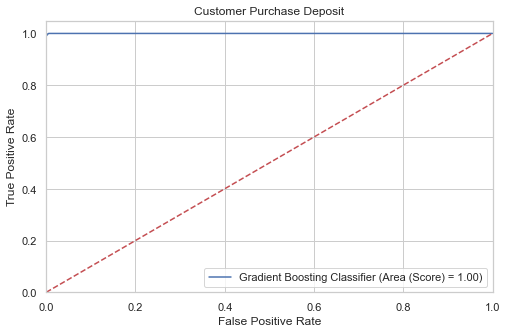

In [145]:
model_eval_train(gb_model, "Gradient Boosting Classifier", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (Gradient Boosting Classifier):



Accuracy = 0.846
Precision = 0.482
Recall = 0.494
F0.5 Score = 0.485
F1 Score = 0.488
Cross Val F1 (k=5) = 0.489
ROC AUC = 0.72
Cross Val ROC AUC (k=5) = 0.756

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       477
           1       0.48      0.49      0.49        83

    accuracy                           0.85       560
   macro avg       0.70      0.70      0.70       560
weighted avg       0.85      0.85      0.85       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 41, FP = 44, TN = 433, FN = 42
Predictly Correct = 474
Predictly Wrong = 86 



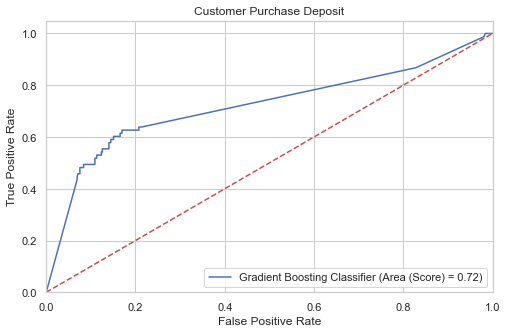

In [146]:
model_eval_test(gb_model, "Gradient Boosting Classifier", X_test, y_test)

In [147]:
acc_gb_train=round(gb_model.score(X_train,y_train)*100,2)
acc_gb_test=round(gb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gb_train))
print("Test Accuracy: {} %".format(acc_gb_test))

Training Accuracy: 99.67 %
Test Accuracy: 84.64 %


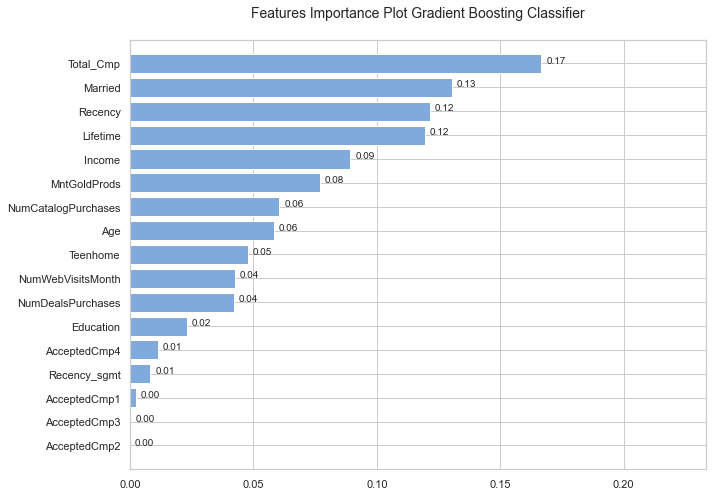

In [148]:
feature_importance_plot(gb_model, "Gradient Boosting Classifier")

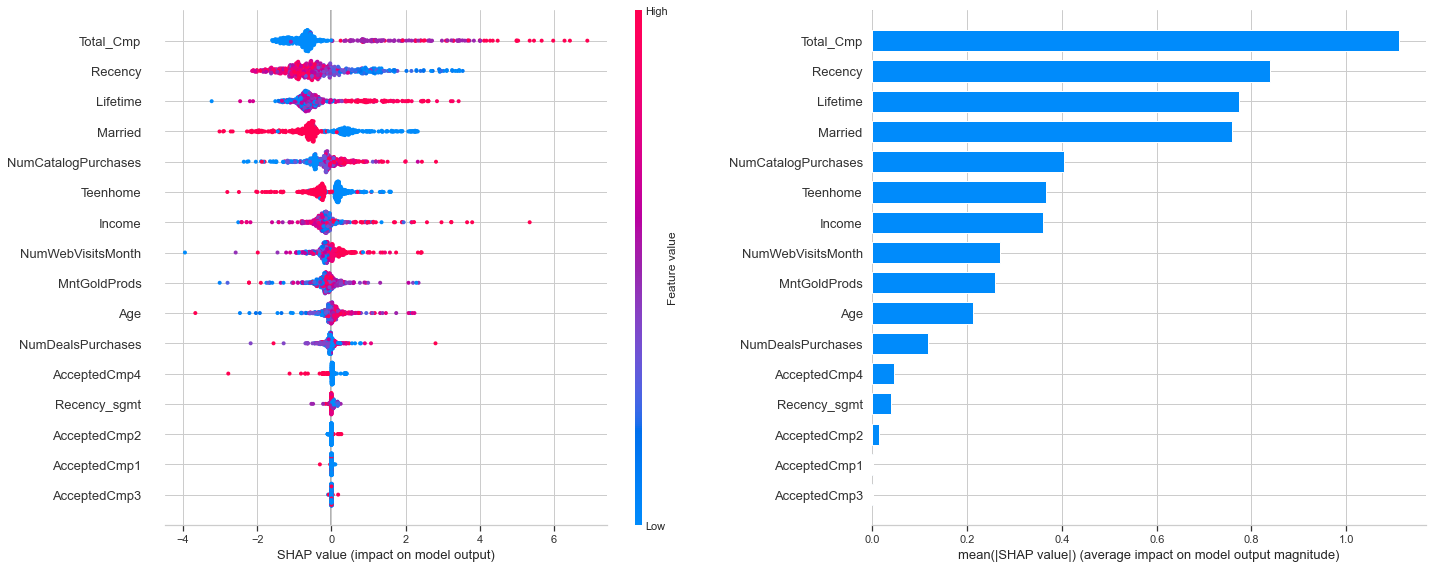

In [215]:
shap_plot(gb_model, "Gradient Boosting Classifier", X_test)

### **6. Support Vector Machine**

In [149]:
# train the model
svm_model = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train, y_train)
print(svm_model)
eval_classification(svm_model, "Support Vector Machine")

SVC(probability=True, random_state=42)


#### **Performance of Training Model**

Classification Report Training Model (Support Vector Machine):

Accuracy = 0.879
Precision = 0.829
Recall = 0.803
F0.5 Score = 0.824
F1 Score = 0.816
Cross Val F1 (k=5) = 0.538
ROC AUC = 0.953
Cross Val ROC AUC (k=5) = 0.928

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1428
           1       0.83      0.80      0.82       714

    accuracy                           0.88      2142
   macro avg       0.87      0.86      0.86      2142
weighted avg       0.88      0.88      0.88      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 573, FP = 118, TN = 1310, FN = 141
Predictly Correct = 1883
Predictly Wrong = 259 



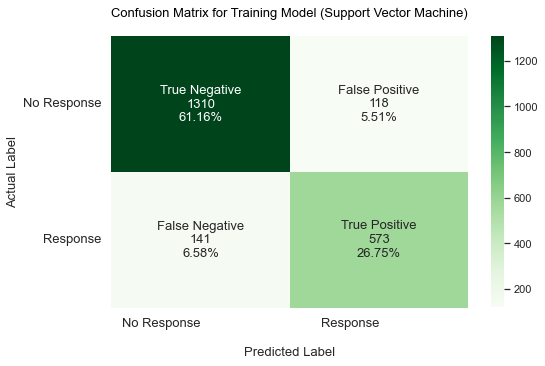

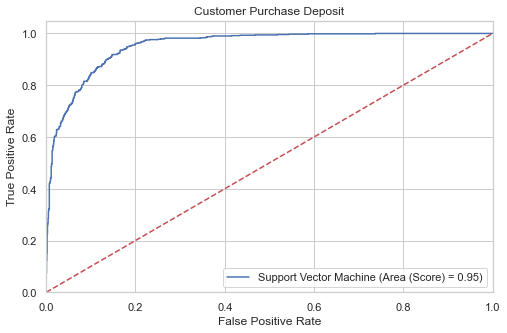

In [150]:
model_eval_train(svm_model, "Support Vector Machine", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (Support Vector Machine):

Accuracy = 0.859
Precision = 0.52
Recall = 0.614
F0.5 Score = 0.537
F1 Score = 0.564
Cross Val F1 (k=5) = 0.448
ROC AUC = 0.895
Cross Val ROC AUC (k=5) = 0.884

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       477
           1       0.52      0.61      0.56        83

    accuracy                           0.86       560
   macro avg       0.73      0.76      0.74       560
weighted avg       0.87      0.86      0.86       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 51, FP = 47, TN = 430, FN = 32
Predictly Correct = 481
Predictly Wrong = 79 



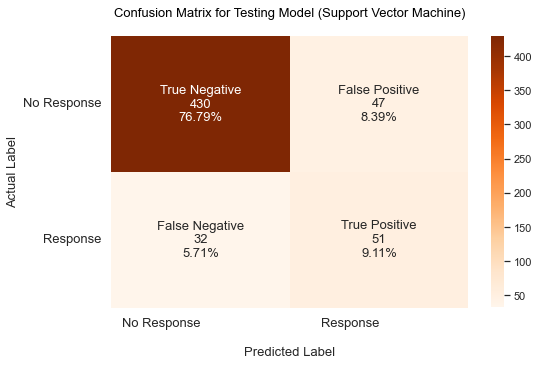

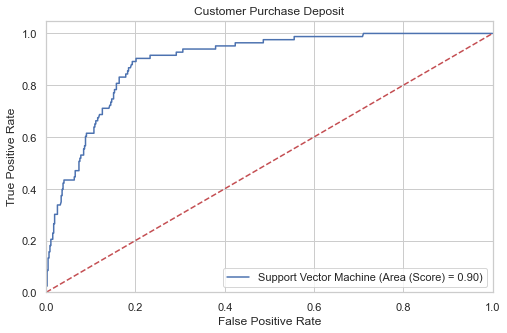

In [151]:
model_eval_test(svm_model, "Support Vector Machine", X_test, y_test)

In [152]:
acc_svm_train=round(svm_model.score(X_train,y_train)*100,2)
acc_svm_test=round(svm_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_svm_train))
print("Test Accuracy: {} %".format(acc_svm_test))

Training Accuracy: 87.91 %
Test Accuracy: 85.89 %


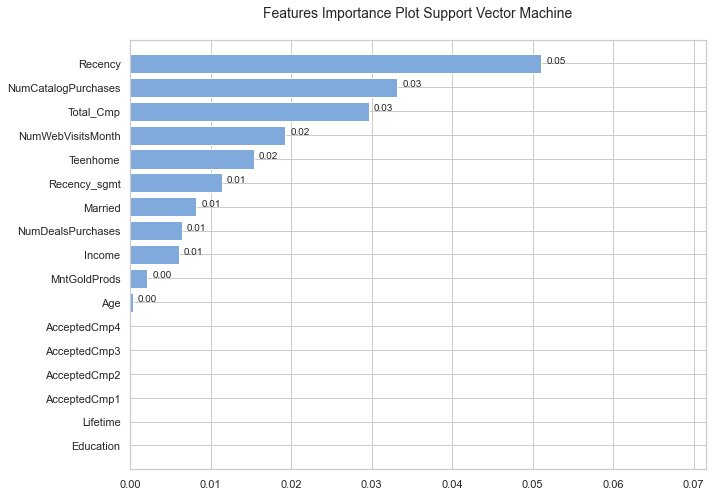

In [153]:
feature_importance_plot(svm_model, "Support Vector Machine", X_train)

In [221]:
# shap_plot(svm_model, "Support Vector Machine", X_test)

### **Summary**

In [154]:
results_eval = pd.DataFrame({
    "Models" : train_modelname_list,
    "Precision (Train)": train_precision_list, 
    "Precision (Test)": test_precision_list, 
    "Recall (Train)": train_recall_list, 
    "Recall (Test)": test_recall_list, 
    "F0.5 Score (Train)" : train_fbeta_score_list,
    "F0.5 Score (Test)" : test_fbeta_score_list,
    "F1 Score (Train)" : train_f1_score_list,
    "F1 Score (Test)" : test_f1_score_list
})

results_eval.drop_duplicates(inplace = True)

results_eval.sort_values(by=["F0.5 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True).style.format(precision=3).background_gradient(cmap="Purples")

In [223]:
import pickle
pickle.dump(rf_model, open('save models/rf_best_model.pkl', 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'save models/rf_best_model.pkl'

In [156]:
import pandas as pd

# Assuming you have a DataFrame 'df' with your model's performance metrics
# Replace the placeholder data with your actual model results
data = {
    'Model': ['KNeighborsClassifier', 'LinearSVC', 'MLPClassifier', 'GradientBoostingClassifier',
              'DecisionTreeClassifier', 'LogisticRegression'],
    'Accuracy': [0.845, 0.859, 0.846, 0.846, 0.838, 0.861],
    'Precision': [0.482, 0.520, 0.483, 0.482, 0.456, 0.523],
    'Recall': [0.639, 0.614, 0.518, 0.494, 0.494, 0.675],
    'F1 Score': [0.549, 0.564, 0.500, 0.488, 0.474, 0.589],
    'Cross Val F1 (k=5)': [0.400, 0.448, 0.558, 0.487, 0.488, 0.510],
    'ROC AUC': [0.842, 0.895, 0.830, 0.725, 0.699, 0.900],
    'Cross Val ROC AUC (k=5)': [0.810, 0.884, 0.887, 0.752, 0.718, 0.885]
}

df = pd.DataFrame(data)

# Round all numerical columns in the DataFrame to three decimal places
df_rounded = df.round(3)


df_rounded.set_index('Model', inplace=True)
df_rounded_sorted = df_rounded.sort_values(by='Accuracy', ascending=False)
final_df = df_rounded_sorted.round(3).style.background_gradient(cmap='Blues')
final_df

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data from your provided picture, replace with your actual data
data = {
    'Models': ['KNeighborsClassifier', 'LinearSVC', 'MLPClassifier', 'GradientBoostingClassifier',
              'DecisionTreeClassifier', 'LogisticRegression'],
    'Precision (Train)': [0.763, 1.000, 0.976, 0.972, 0.719, 0.755],
    'Precision (Test)': [0.465, 0.484, 0.710, 0.724, 0.441, 0.528],
    'Recall (Train)': [0.871, 0.990, 0.920, 0.912, 0.574, 0.660],
    'Recall (Test)': [0.639, 0.554, 0.530, 0.506, 0.542, 0.675],
    'F1 Score (Train)': [0.814, 0.995, 0.947, 0.941, 0.639, 0.704],
    'F1 Score (Test)': [0.538, 0.517, 0.607, 0.596, 0.486, 0.593],
    'Total Diff': [0.806, 1.430, 0.996, 0.999, 0.463, 0.323]
}

df = pd.DataFrame(data)

# Round all numerical columns in the DataFrame to three decimal places
df_rounded = df.round(3)


df_rounded.set_index('Models', inplace=True)
df_rounded_sorted = df_rounded.sort_values(by='Total Diff', ascending=True)
final_df = df_rounded_sorted.round(3).style.background_gradient(cmap='Blues')
final_df

In [ ]:
rf_best_model_temp = pickle.load(open('save models/rf_best_model.pkl', 'rb'))